## Module: Programming for Data Analysis
## Project 2: Investigation of the Wisconsin Breast Cancer dataset 

## Contents

1. [Problem Statement](#Problem-Statement)<br>
2. [Dataset description](#Dataset-description)<br>
3. [Import libraries](#Import-libraries)<br>
4. [Dataset analysis and review](#Dataset-analysis-and-review)<br>
    a.[Check for null values](#Check-for-null-values)<br>
    b.[Check data type](#Check-data-type)<br>
    c.[Tidy dataset](#Tidy-dataset)<br>
    d.[Basic statistics of dataset](#Basic-statistics-of-dataset)<br>
5. [Classifiers review](#Classifiers-review)<br>
    a.[Classifier definition](#Classifier-definition)<br>
6. [Classifier types and applications](#Classifier-types-and-applications)<br>
    a.[Decision Tree](#Decision-Tree)<br>
    b.[Naive Bayes Classifier](#Naive-Bayes-Classifier)<br>
    c.[K-Nearest Neighbours](#K-Nearest-Neighbours)<br>
    d.[Support Vector Machines](#Support-Vector-Machines)<br>
    e.[Logistic Regression](#Logistic-Regression)<br>
7. [How is a classifer evaluated?](#How-is-a-classifer-evaluated?)<br>
6. [Statistical analysis of dataset](#Statistical-analysis-of-dataset)<br>
    a.[Ratio of negative to positive results](#Ratio-of-negative-to-positive-results)<br>
    b.[Correlation between variables](#Correlation-between-variables)<br>
    c.[Plot variables against diagnosis](#Plot-variables-against-diagnosis)<br>
7. [Conclusion](#Conclusion)<br>
30. [References](#References)

## Problem Statement

This project will investigate the Wisconsin Breast Cancer dataset, through the following requirements:<br>

- Undertake an analysis/review of the dataset and present an overview and background.
- Provide a literature review on classifiers which have been applied to the dataset and compare their performance
- Present a statistical analysis of the dataset
- Using a range of machine learning algorithms, train a set of classifiers on the dataset (using 
    SKLearn etc.) and present classification performance results. 
- Detail the rationale for the parameter selections you made while training the classifiers.
- Compare, contrast and critique your results with reference to the literature
- Discuss and investigate how the dataset could be extended – using data synthesis of new tumour datapoints

## Dataset description

The dataset dates from 1995 and the features generated for the dataset are from an image of a biopsy of the breast tissue.<br>
Fine Needle Aspiration (FNA) is a type of biopsy where a thin, hollow needle is used to remove fluid or tissue - in the case of this dataset, tissue.<br>
Images were taken of the tissue samples, digitized and the features in the dataset describe characteristics of the cell nuclei present in the image.<br>

Further explanation of FNA can be found [here](https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/fine-needle-aspiration-biopsy-of-the-breast.html), and a detailed description of the dataset can be found [here](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?select=data.csv)

## Import libraries

In [1]:
# Numerical arrays, tabular data
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt 
import seaborn as sns;

# Scientific libraries
from scipy import stats

## Import dataset

In [38]:
#https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?select=data.csv
#df = pd.read_csv('https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?select=data.csv')
df = pd.read_csv('wisconsin.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Dataset analysis and review

###  Check for null values

In [39]:
# Check for null values and display as a list
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### Check data type

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

All variables are floating point, bar the id (integer) and the diagnosis

### Tidy dataset

Delete the *id* and *Unnamed: 32* columns.<br> 
The *id* column in this case, might refer to patient numbers. The in-built row numbering for pandas will be used instead for consistency.
*Unnamed: 32* has 0 values and can thus also be deleted.<br>

*M* and *B* in the diagnosis column represent *Malignant* and *Benign* respectively. It can be changed to 1 and 0, where 1 represents a positive result and 0 a negative one.

In [41]:
# Drop the id and Unnamed: 32 columns.
df = df.drop(['id','Unnamed: 32'], axis=1)

# Replace the M and B with 1 and 0
df['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Basic statistics of dataset

In [28]:
# As there's so many variables, transpose so that variable list is vertical
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Classifiers review

### Classifier definition

A *classifier* is any algorithm that can categorise information or sort data into labelled classed.<br>
An example of a classifier is the spam filter on your email software.


A *classification model* is the result of the machine learning done by the classifier.<br>
Because the model has been trained using the classifier, it's the model itself that classifies any future data.

There are [*supervised* and *unsupervised*](https://monkeylearn.com/blog/machine-learning-algorithms/#supervised) classifiers.

*Supervised* classifiers need:
- A training dataset
- dataset that has variables already  sorted/categorised

There are two types of *Supervised* classifier types: 
1) *classification*
2) *regression*

With *classification*, the result will always be in a finite set of classes or categories (determined by the training dataset).

With *regression*, the result will be probability as a continuous number value, between 0 and 1. It's used to predict the probability that something will occur, i.e. stock prices, housing market trends, etc.


*Unsupervised* classifiers need:
- An unlabelled dataset

From the unlabelled dataset, the *unsupervised* classifier will determine patterns and anomalies in the data and make classify or structure the data as it sees fit.

As the Wisconsin Breast Cancer dataset contains structured data, only *supervised* classifiers will be used to develop a model for predicting cancer rates.

## Classifier types and applications

<br>


All the algorithms below are types of *supervised* learning algorithms.

### Decision Tree

A decision tree is a classification algorithms that builds models akin to a tree, i.e.<br>

*sports* is the trunk<br>
*sport type* are the branches (field sports, bat sports, etc)<br>
*exact sport name* are the 'leaves', i.e. (soccer, hurling, tennis, etc)<br>

Decision trees use *if-then* rules to classify data into precise categories - however, in order to do this, high-quality data (i.e. no errors or missing values, etc) is needed to avoid the branches being skewed or over-fitted.

### Naive Bayes Classifier

This is, in fact, a family of probabilistic algorithms.<br>
Naive Bayes calculates the possibility that any given data point may be assigned to a category, or indeed, multiple categories.

Naive Bayes is often used for text analysis to categorise emails, news, articles, customer comments for online reviews, etc, into categories.<br>
Moving from phrase to phrase, the classifier will calculate the probabililty that a data point belongs in that particular category - Yes/No.

### K-Nearest Neighbours

K-Nearest Neighbours is often abbreviated to k-NN.<br>
It's a pattern recognition algorithm and works by learning from training data points and calculates how the data corresponds to other data in the training space.<br>
k-NN wants to:<br>
- find the *k* most closely related (correlated) data points in future data
- by calculating the correlation of data points within *n*-dimensional space

### Support Vector Machines

Support Vector Machines are commonly abbreviated to *SVM*.
SVM algorithms classify data and train models with precision *(rewrite this)* to create a n-dimensional classsification model.
For 2-dimensional data (i.e. x, y) this is simply a line of best fit and not the strongest suit of SVM.
However, for data that is in 3-dimensions, the *hyperplane* (line of best fit) can be very accurate.
SVM create accurate ML models as they were designed to work with multidimensional data.

### Logistic Regression

Logistic regression is an algorithm that predicts a binary outcome.<br>
This can be:<br>
- 1 or 0
- Yes or No
- Pass or Fail

Independent variables can be either categorical or numeric; however, the dependent variable is always categorical, i.e.<br>
"What is the probability of category X given independent variable Y?

## How is a classifer evaluated?

## Statistical analysis of dataset

When doing any analysis or plotting, the variables will be named as follows:<br>
*variable_name*_*statistic_name* <br>
i.e.<br>
*concave points_worst* would become<br>
cpw_mean

### Ratio of negative to positive results

How many negative results versus positive from the dataset?

In [53]:
# below gives the percentage of negative (0) versus positive (1)
df["diagnosis"].value_counts('0')*100

0    62.741652
1    37.258348
Name: diagnosis, dtype: float64

So approximately 63% negative and 37% postive results in the dataset.

### Correlation between variables

In [61]:
print(df.corr()['diagnosis'].sort_values(ascending = False),'\n')

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

### Plot variables against diagnosis

Below is grouped by variable (vertically) and diagnosis (horizontally), by the mean value of each variable.<br>
This is done so that one can quickly look at the values for the variables and get an idea as to a potential diagnosis, before running through any machine learning model.

In [146]:
df.groupby('diagnosis').mean().transpose()

diagnosis,0,1
radius_mean,12.146524,17.462830
texture_mean,17.914762,21.604906
perimeter_mean,78.075406,115.365377
area_mean,462.790196,978.376415
smoothness_mean,0.092478,0.102898
compactness_mean,0.080085,0.145188
concavity_mean,0.046058,0.160775
concave points_mean,0.025717,0.087990
symmetry_mean,0.174186,0.192909
fractal_dimension_mean,0.062867,0.062680


Now the variables can be plotted against diagnosis, to get a visual viewpoint of the variables versus diagnosis.<br>
Variables are listed on the x-axis and the count of the variables on the y-axis.

In [84]:
cancer_variables = df.columns.values.tolist()
cancer_variables

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

<Figure size 2000x1000 with 0 Axes>

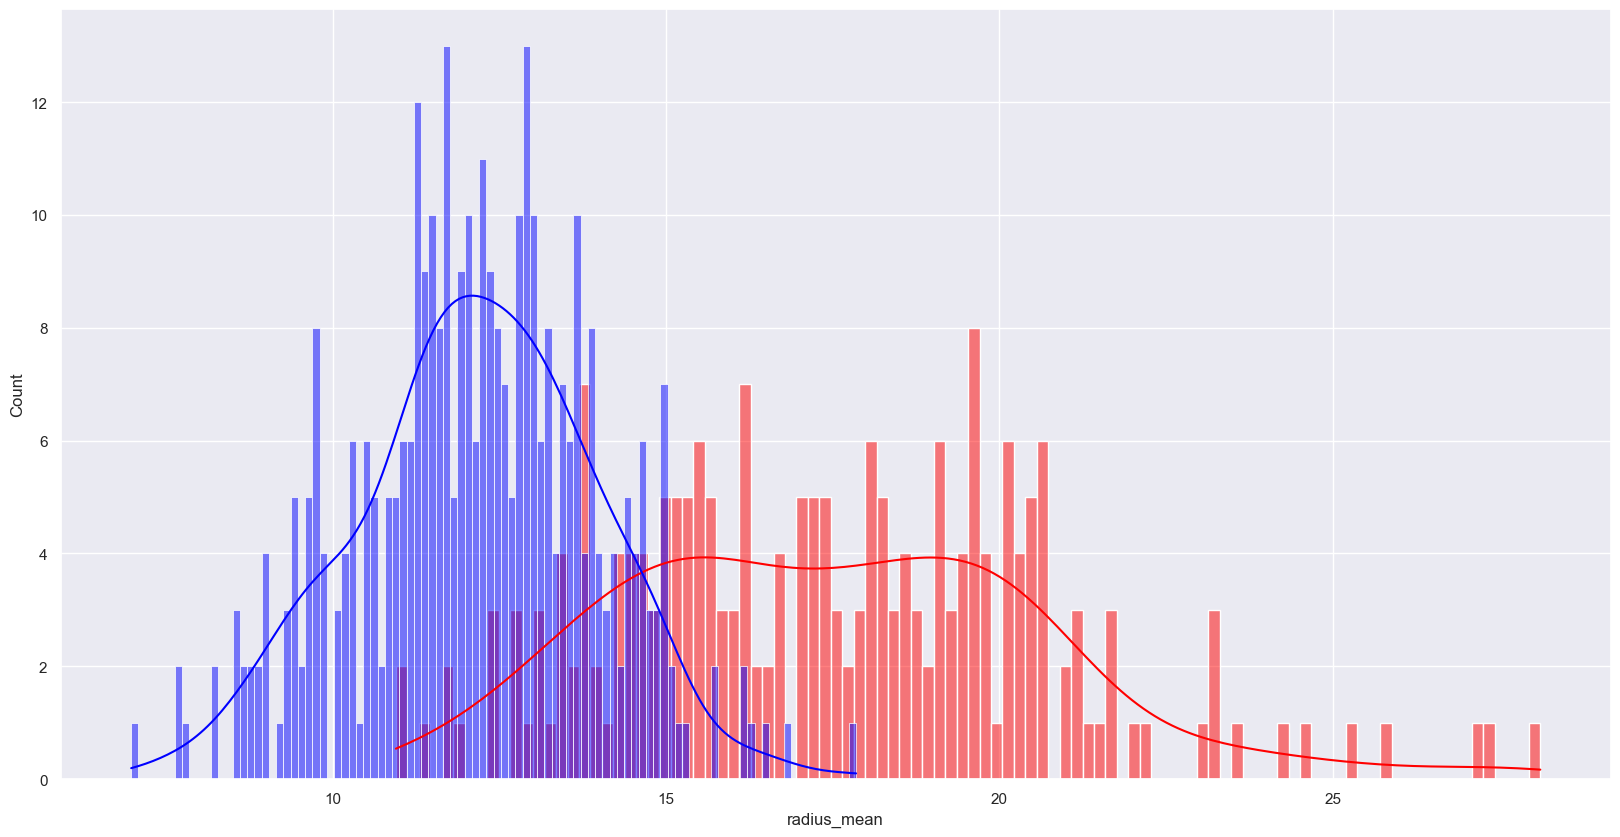

<Figure size 2000x1000 with 0 Axes>

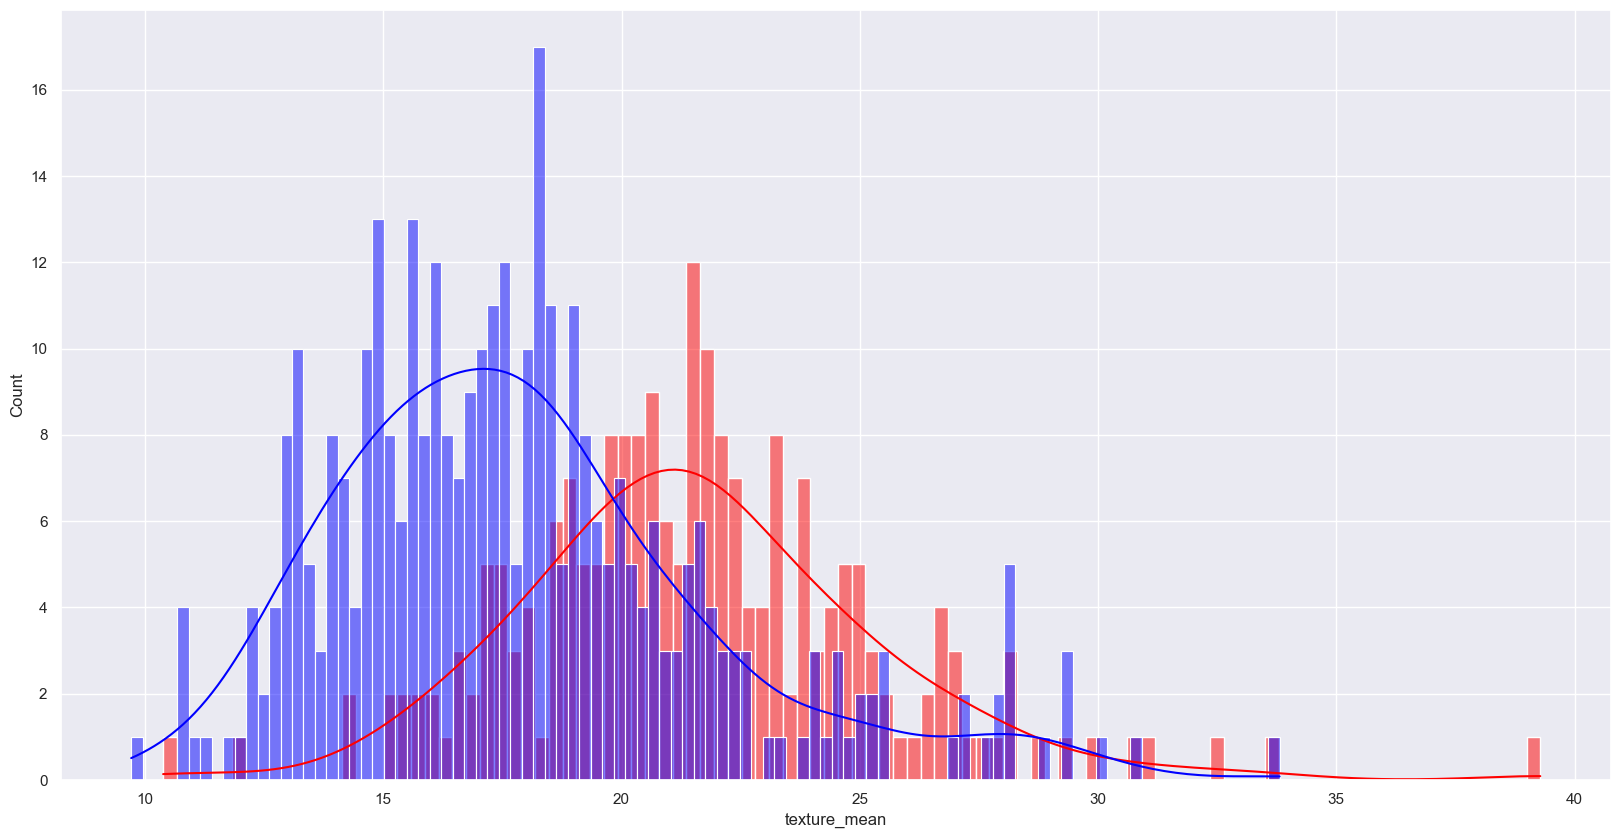

<Figure size 2000x1000 with 0 Axes>

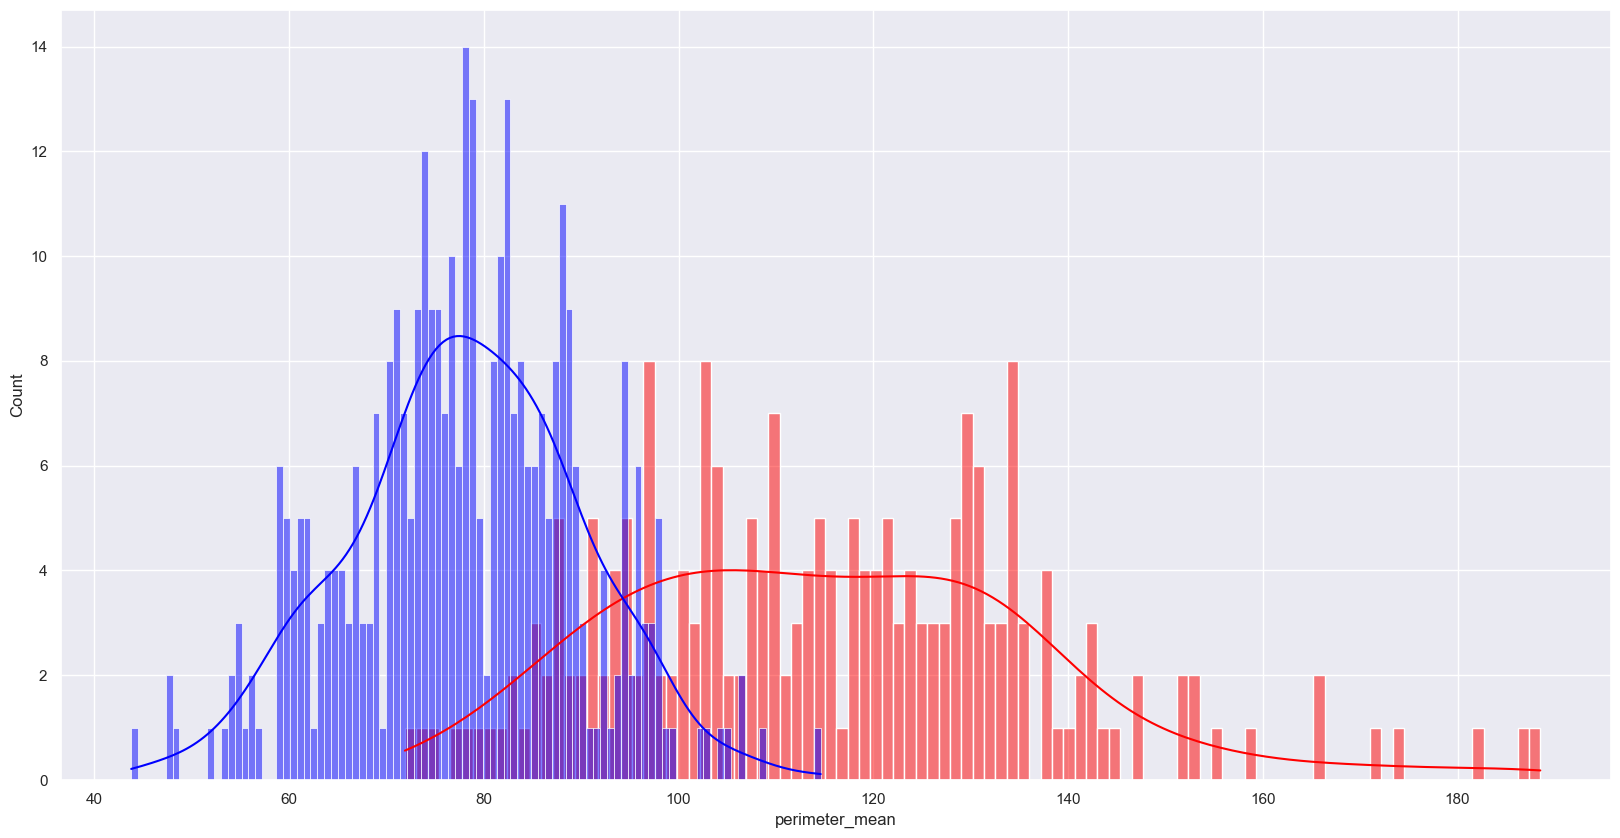

<Figure size 2000x1000 with 0 Axes>

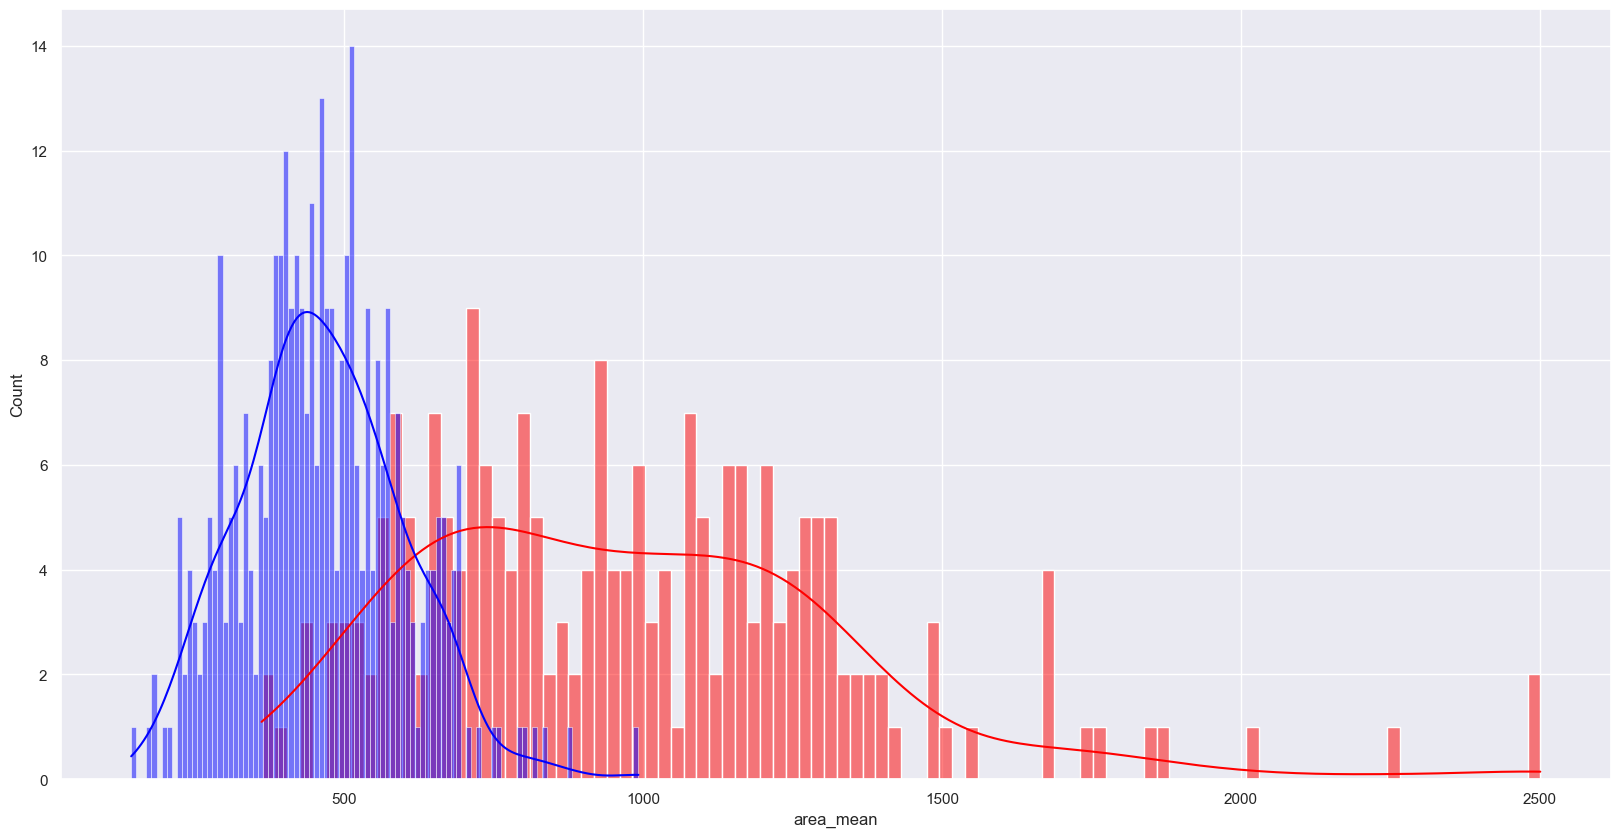

<Figure size 2000x1000 with 0 Axes>

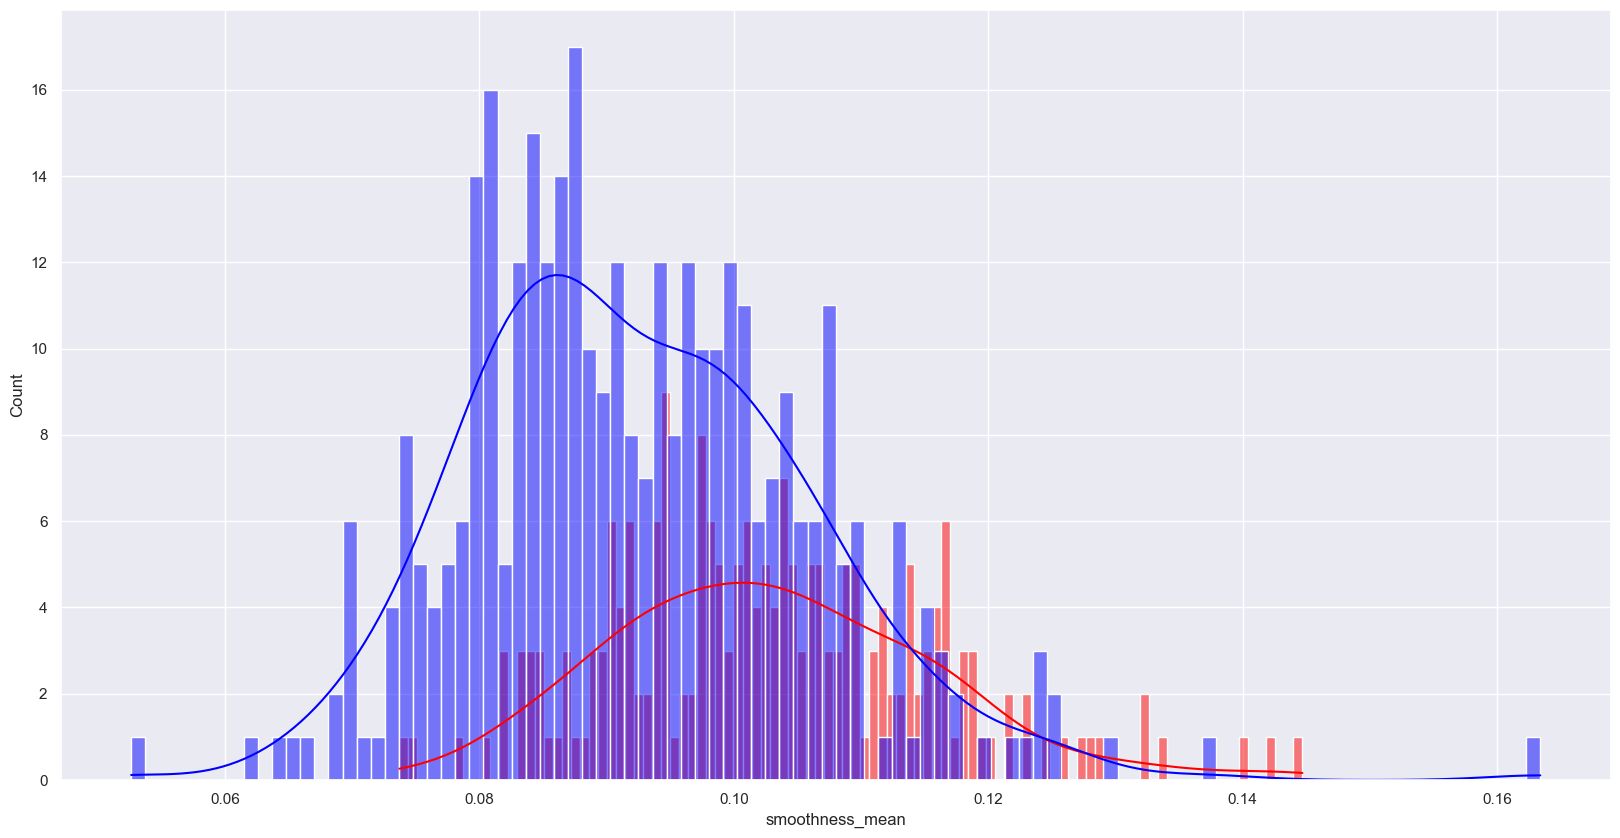

<Figure size 2000x1000 with 0 Axes>

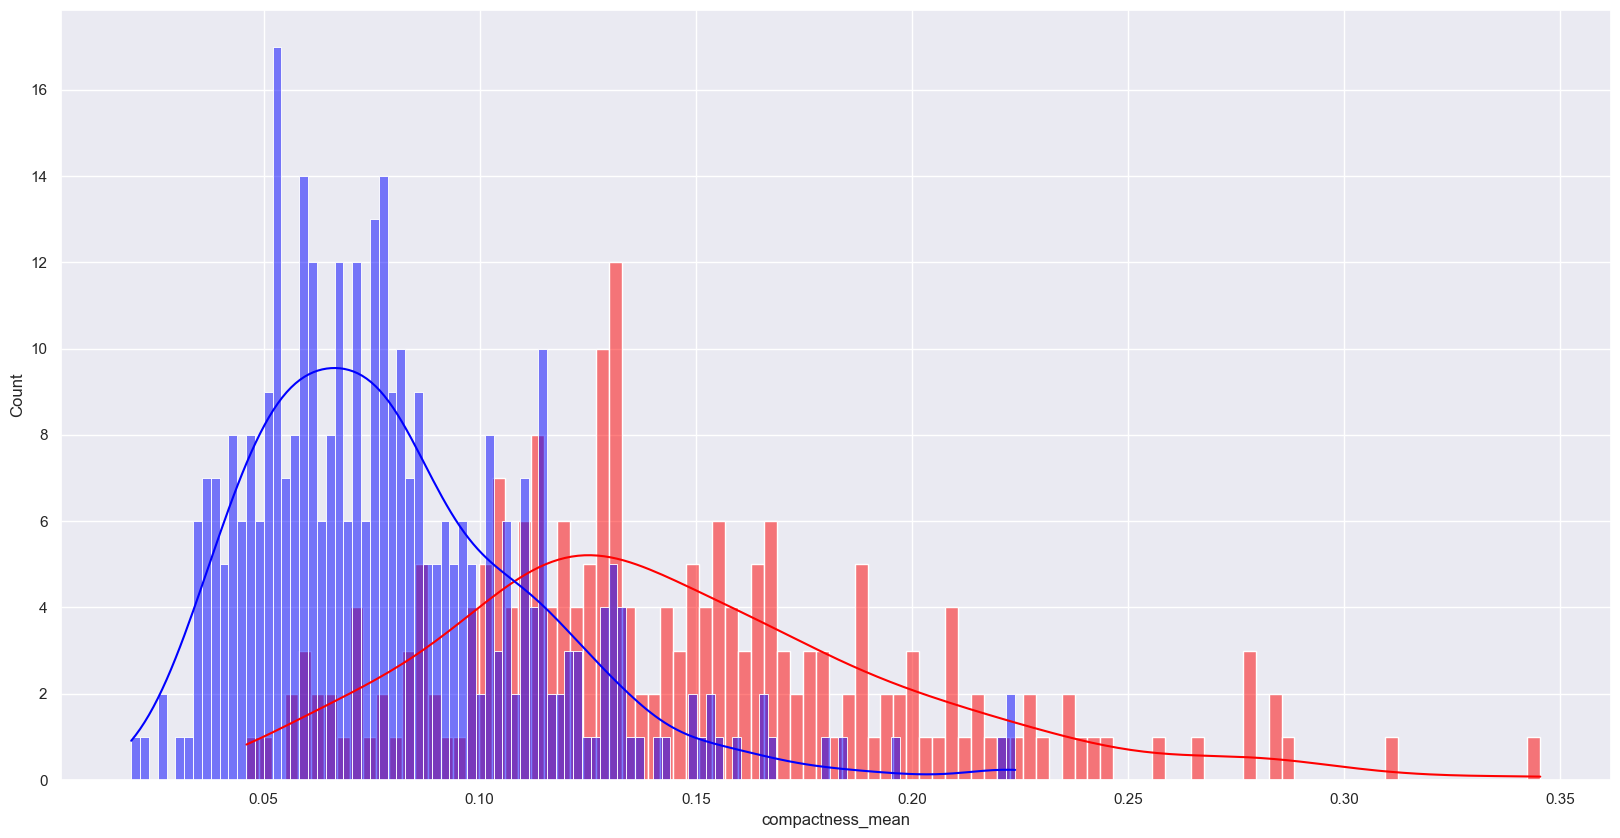

<Figure size 2000x1000 with 0 Axes>

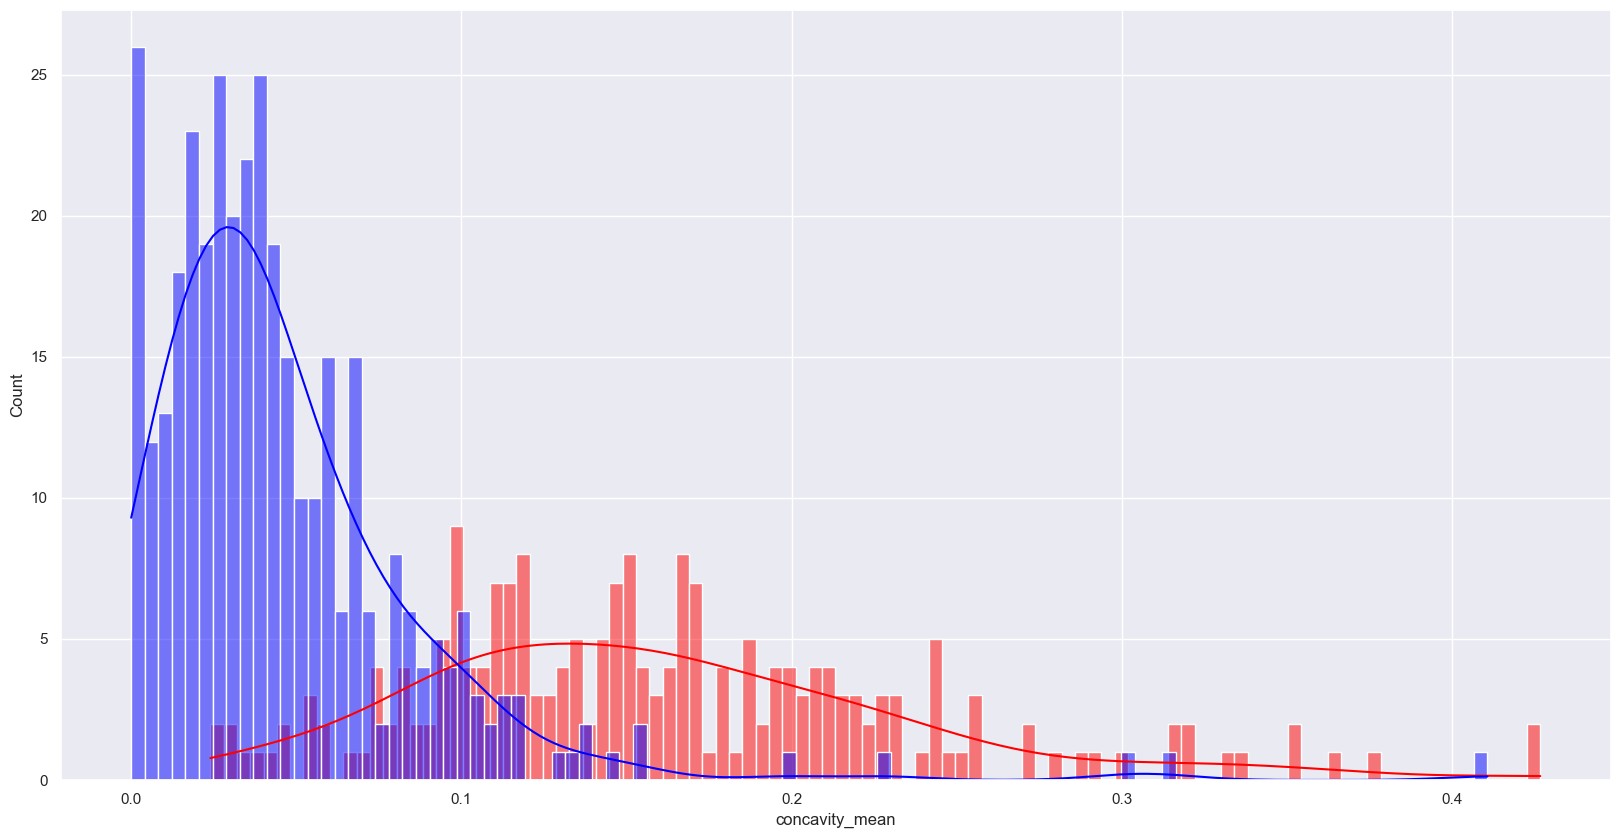

<Figure size 2000x1000 with 0 Axes>

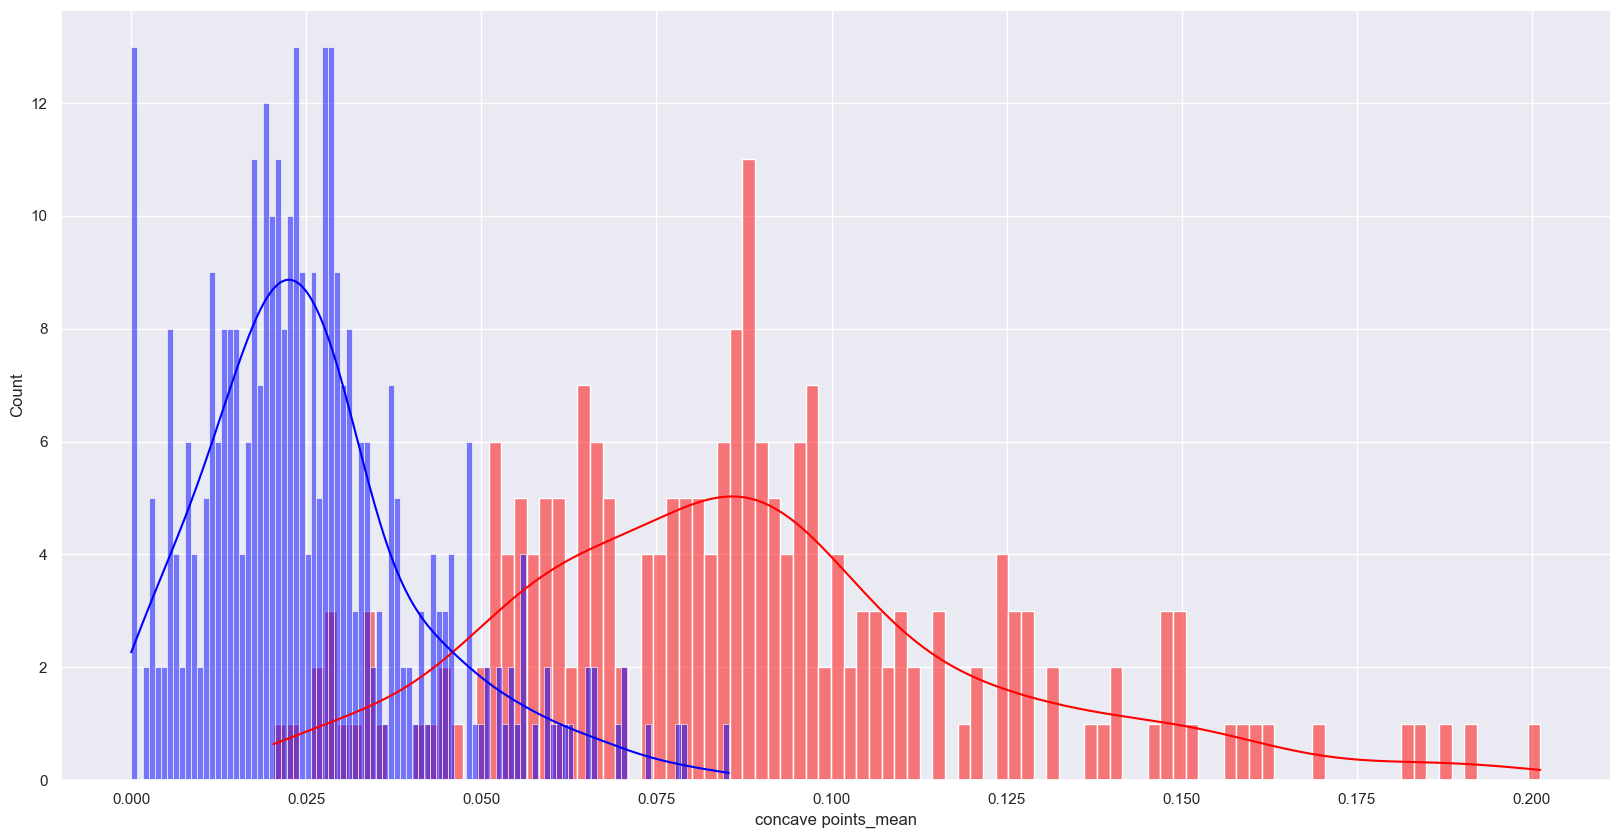

<Figure size 2000x1000 with 0 Axes>

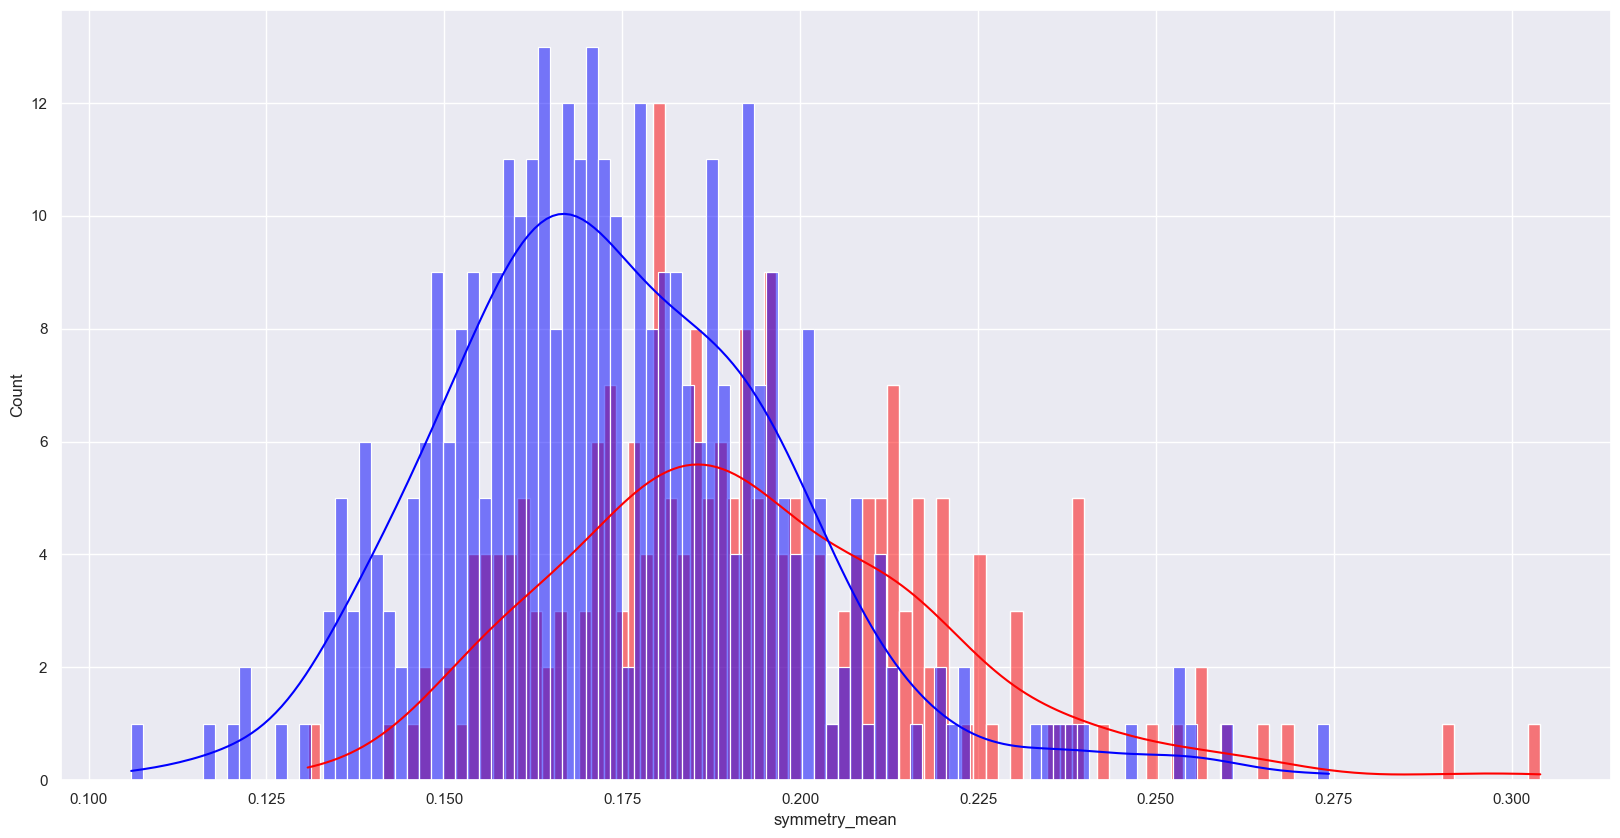

<Figure size 2000x1000 with 0 Axes>

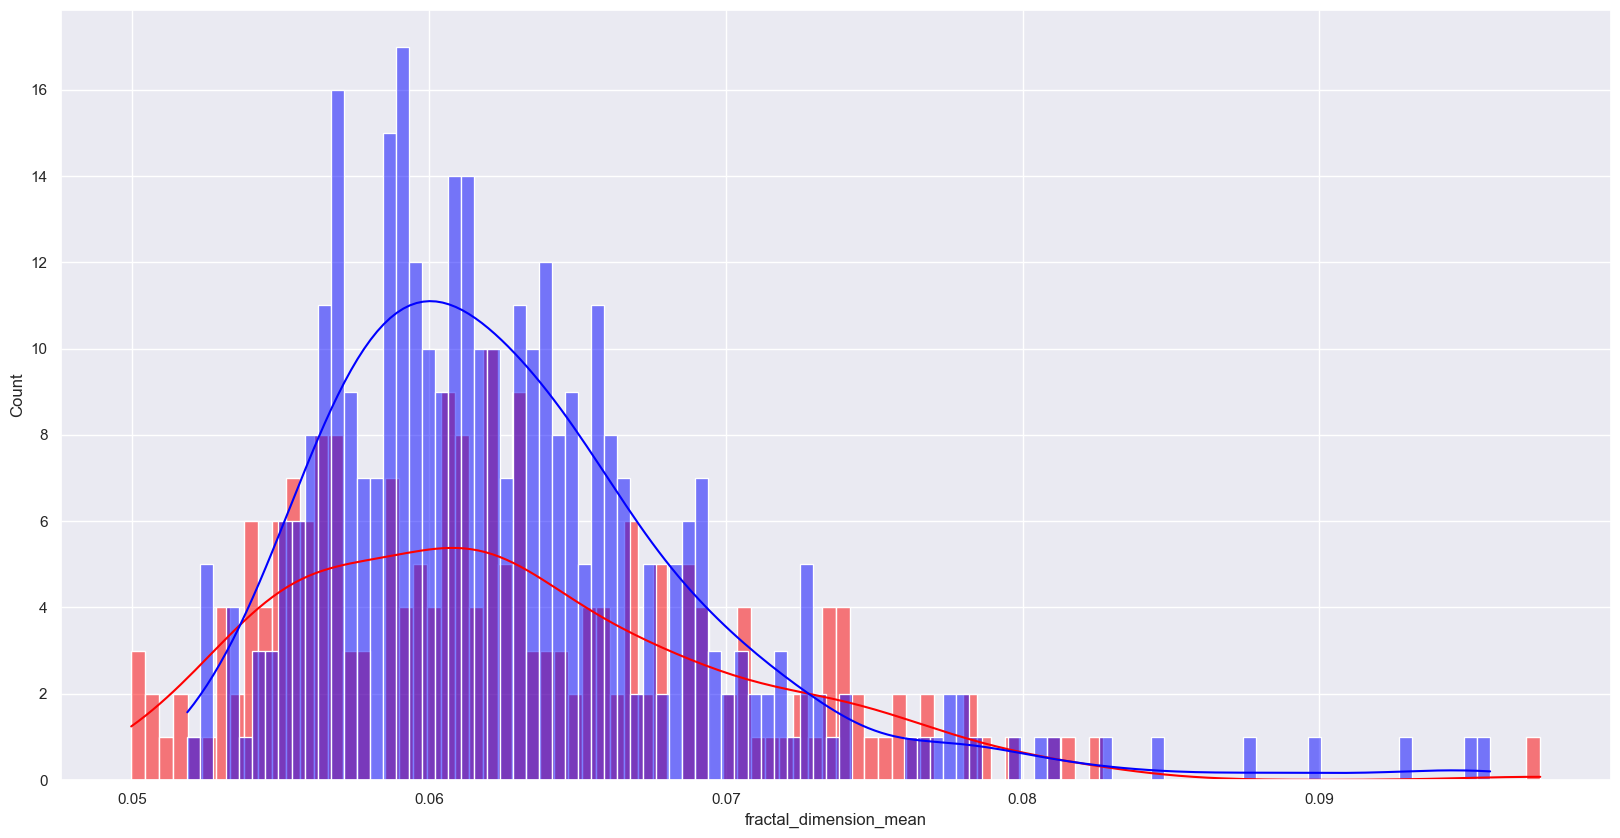

<Figure size 2000x1000 with 0 Axes>

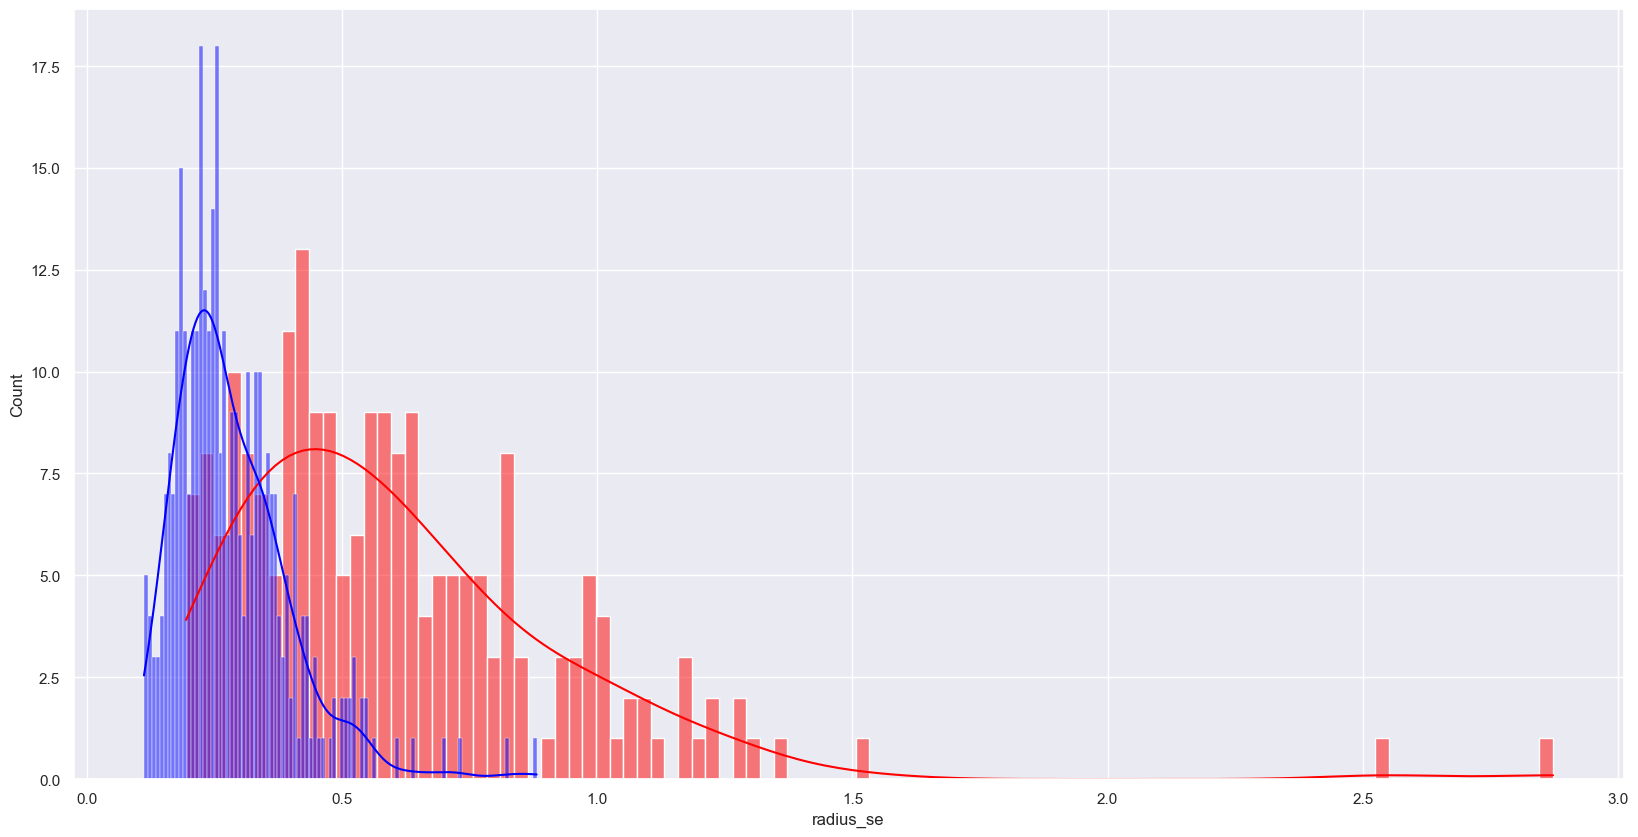

<Figure size 2000x1000 with 0 Axes>

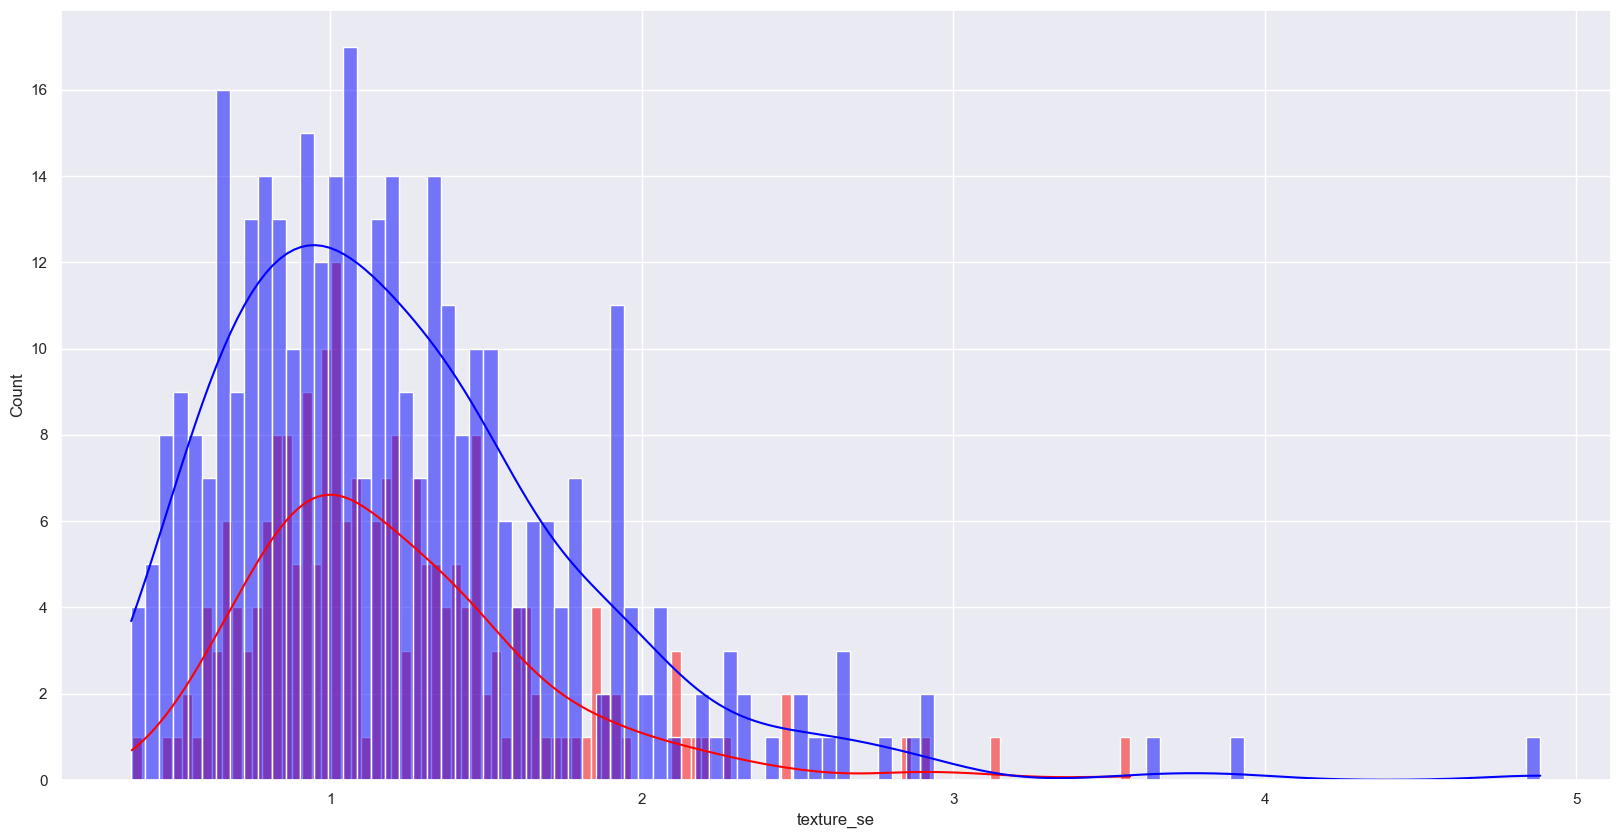

<Figure size 2000x1000 with 0 Axes>

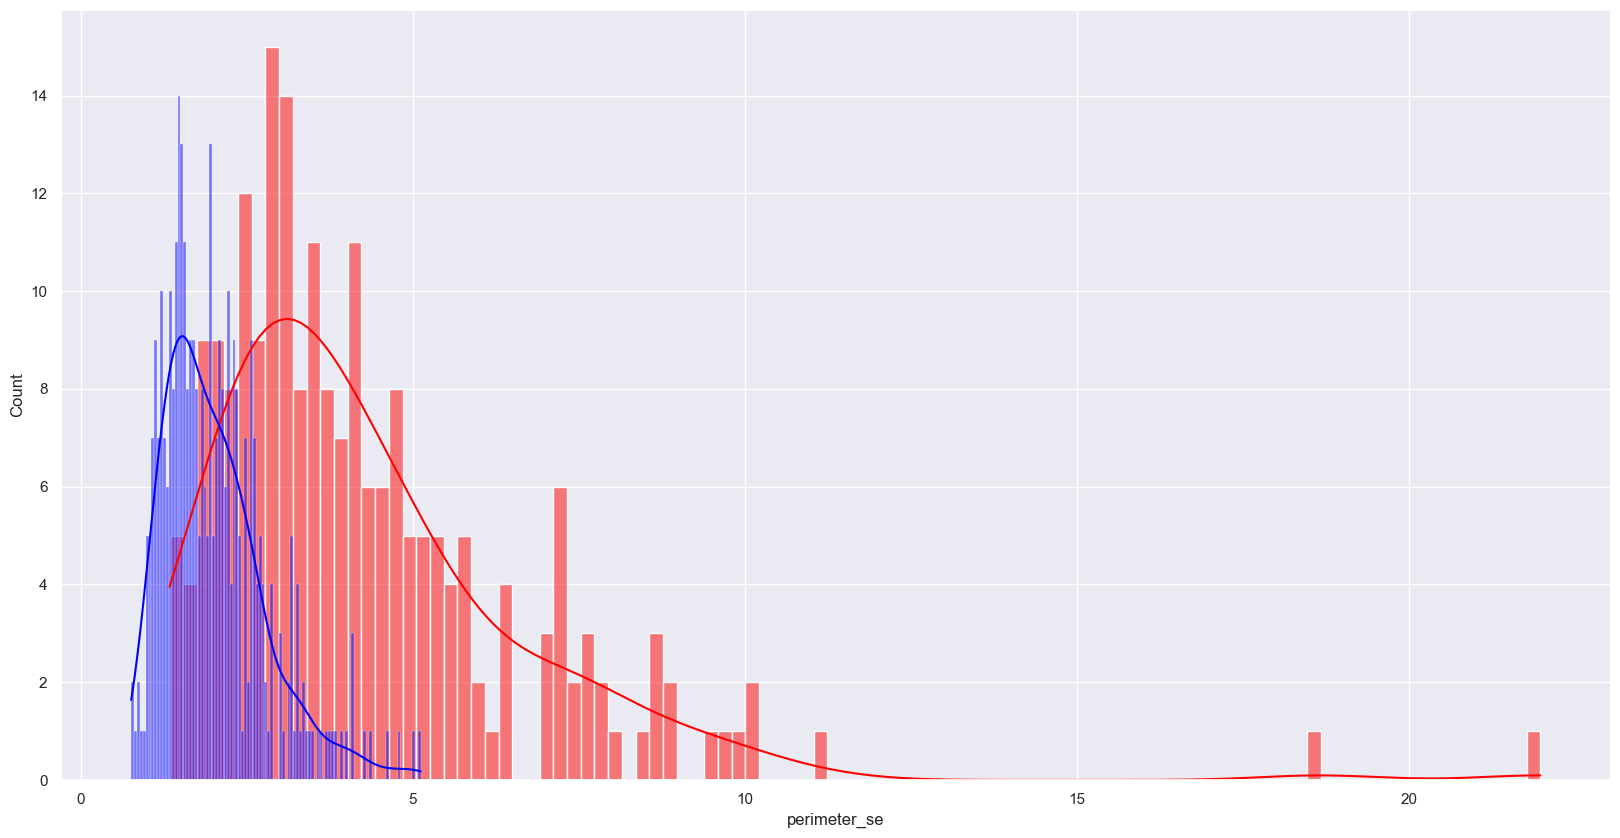

<Figure size 2000x1000 with 0 Axes>

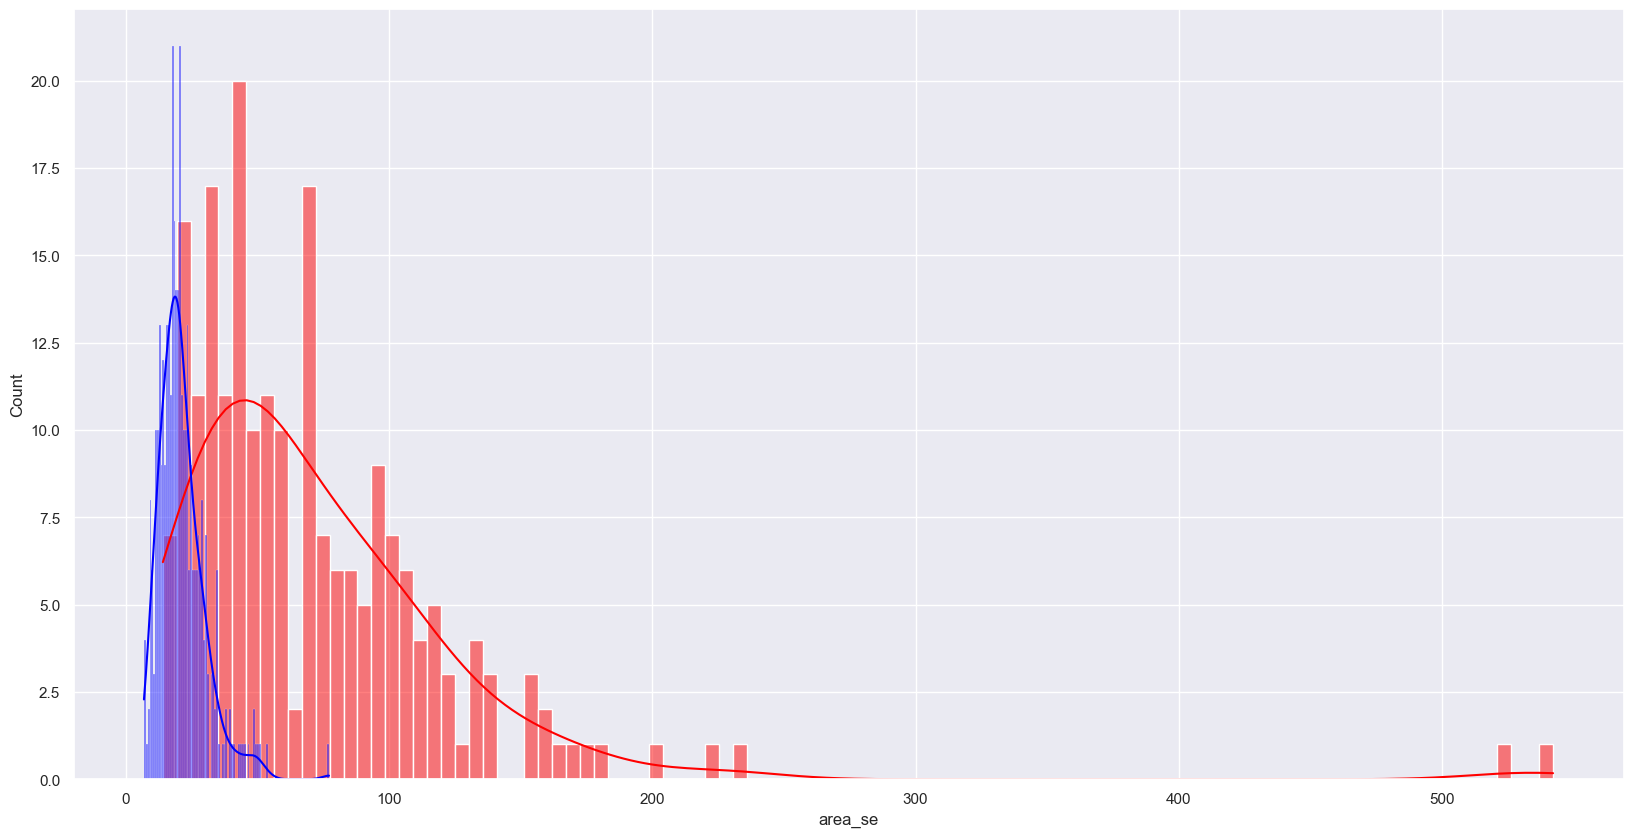

<Figure size 2000x1000 with 0 Axes>

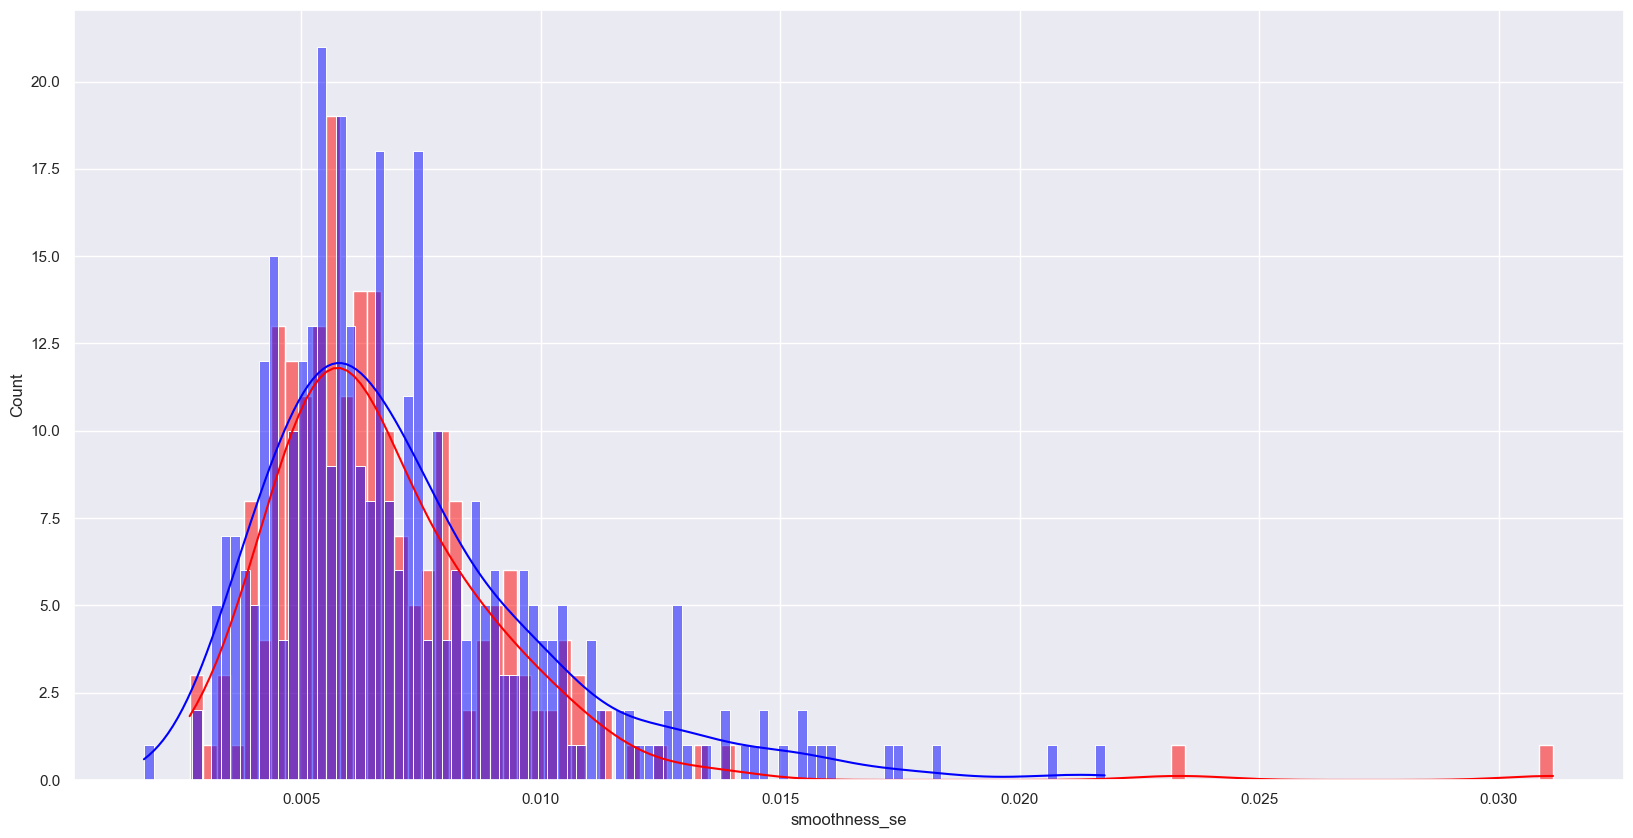

<Figure size 2000x1000 with 0 Axes>

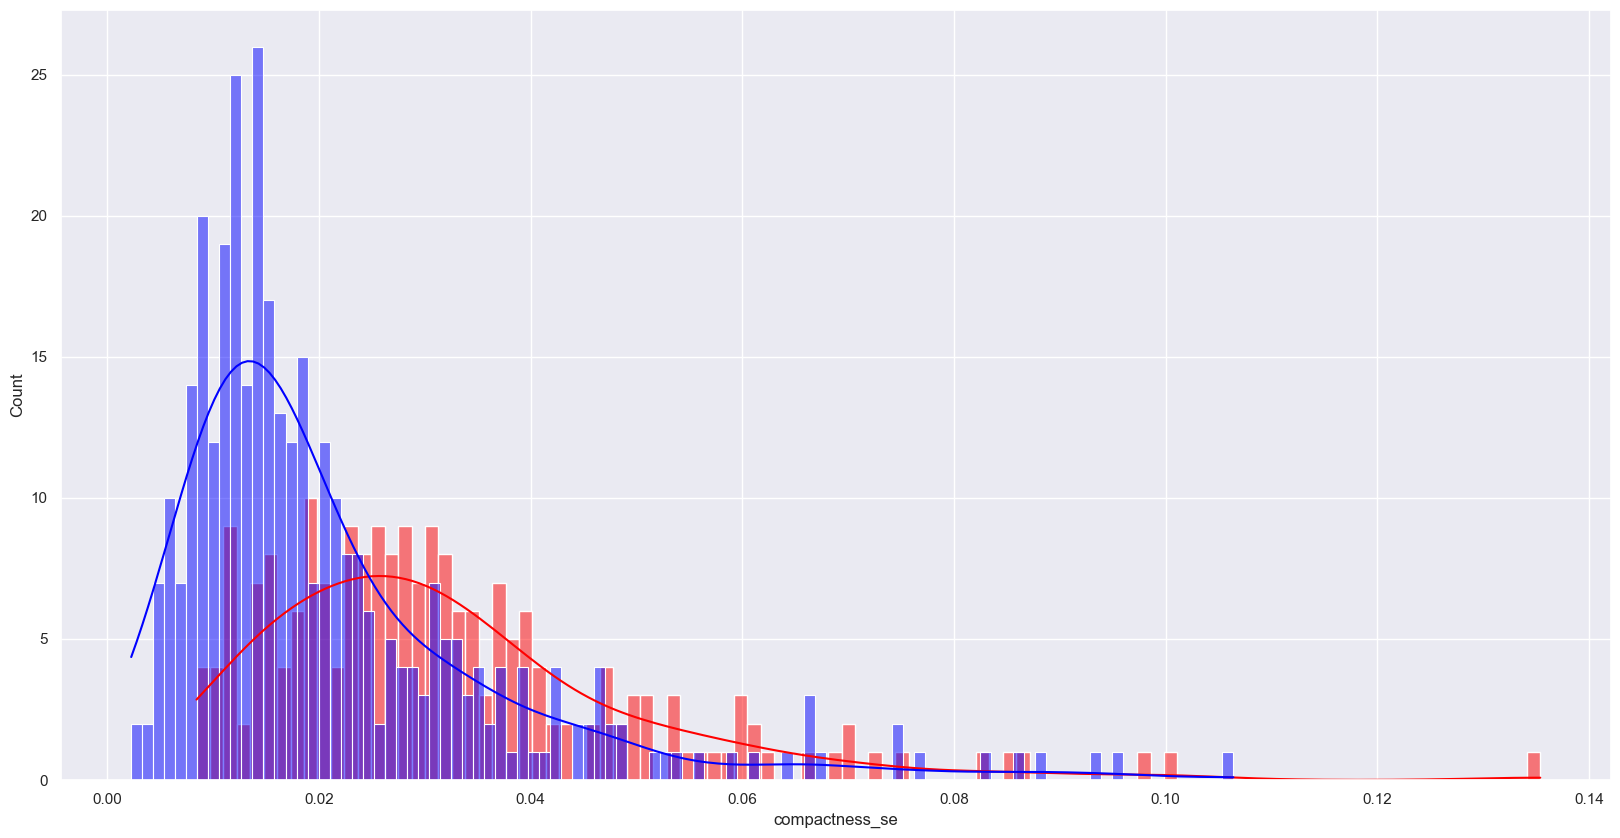

<Figure size 2000x1000 with 0 Axes>

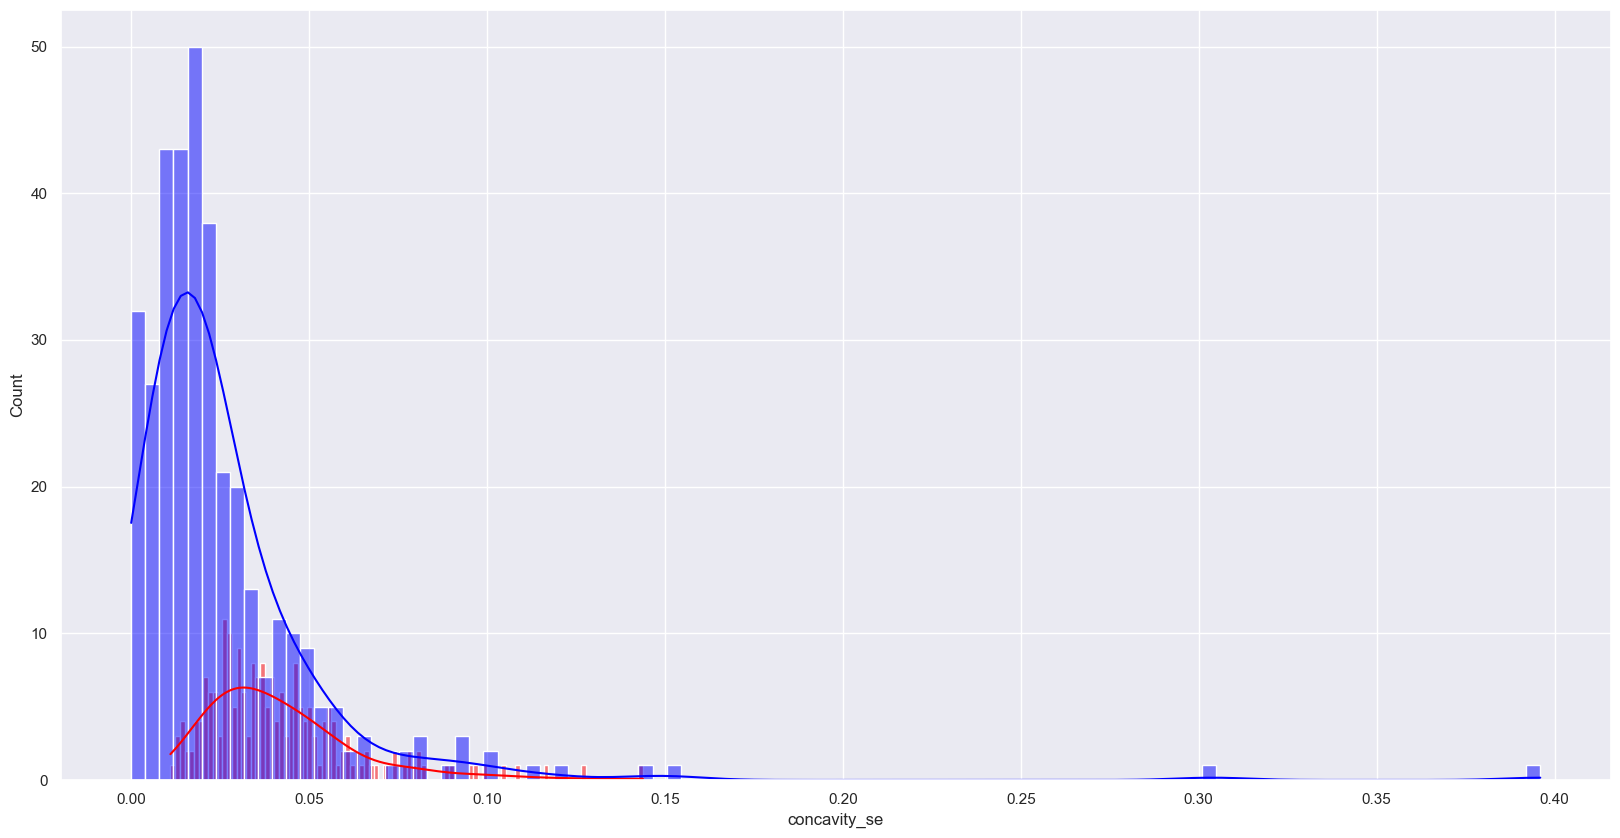

<Figure size 2000x1000 with 0 Axes>

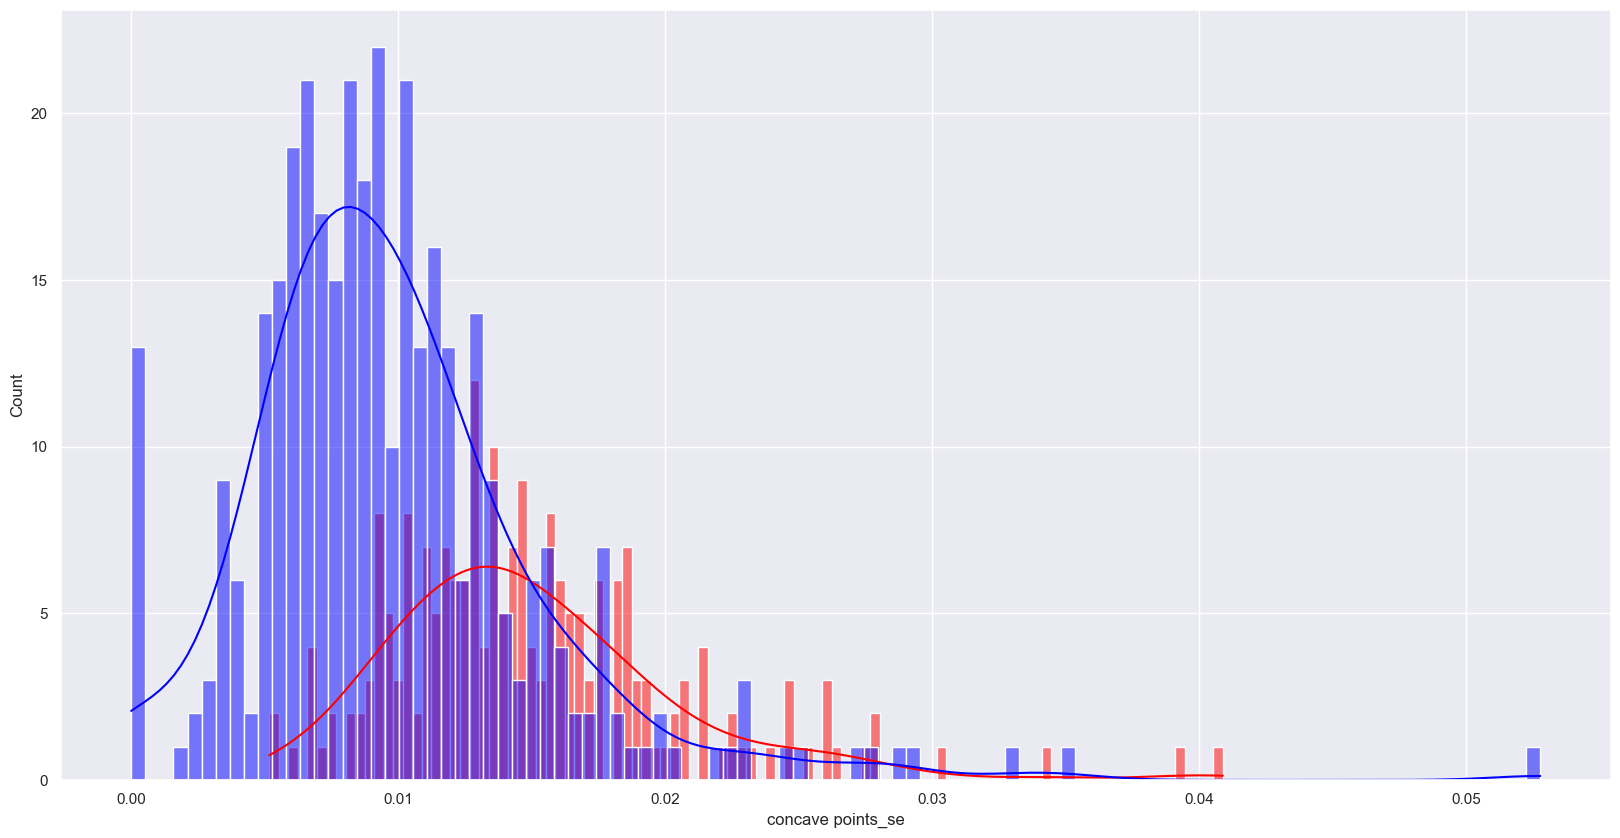

<Figure size 2000x1000 with 0 Axes>

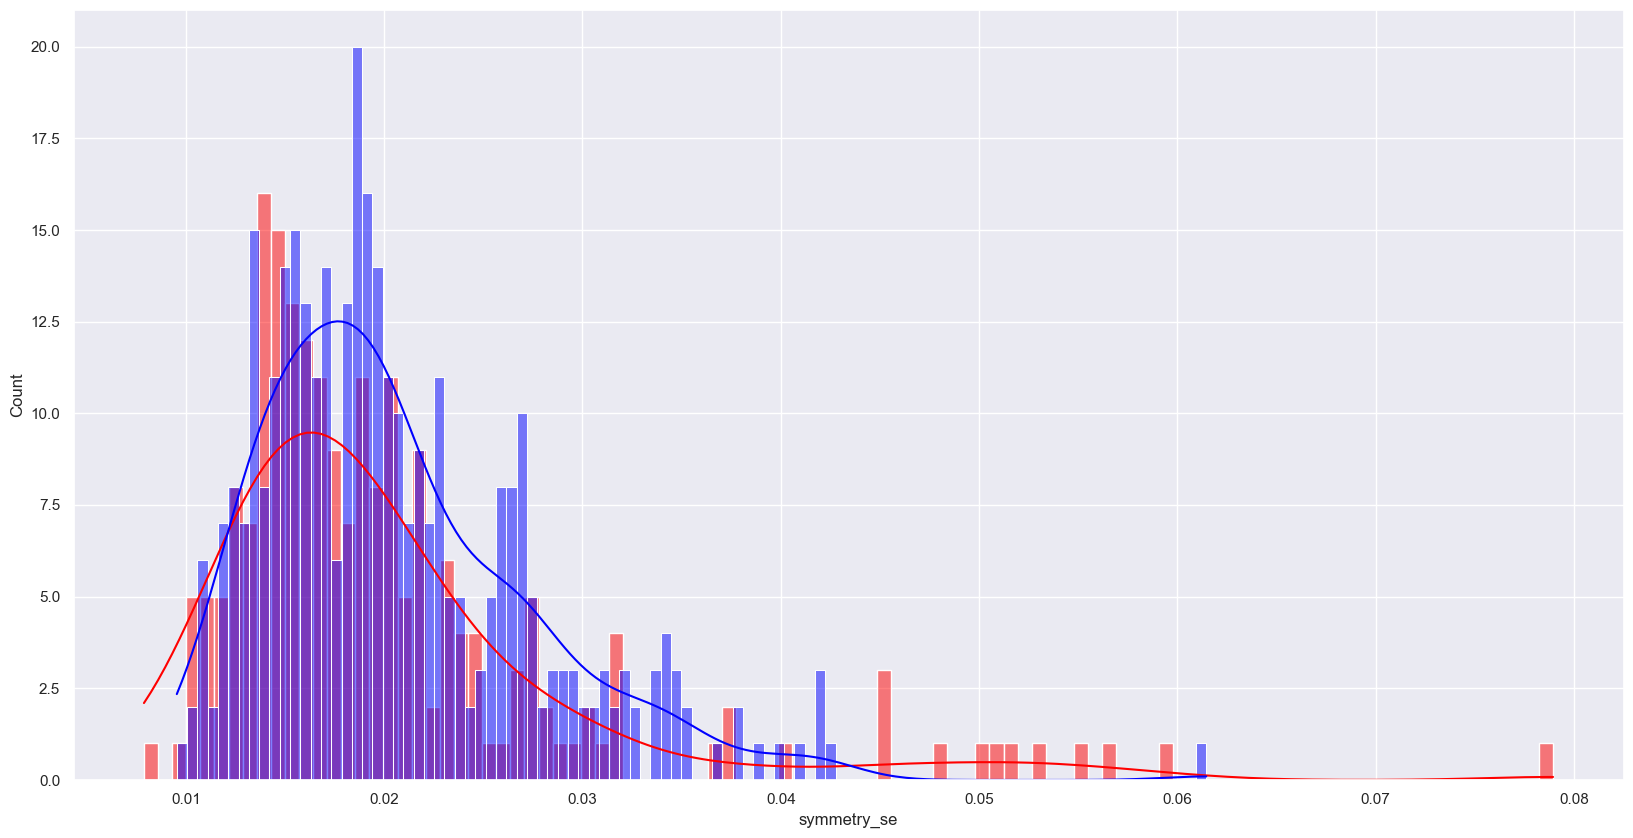

<Figure size 2000x1000 with 0 Axes>

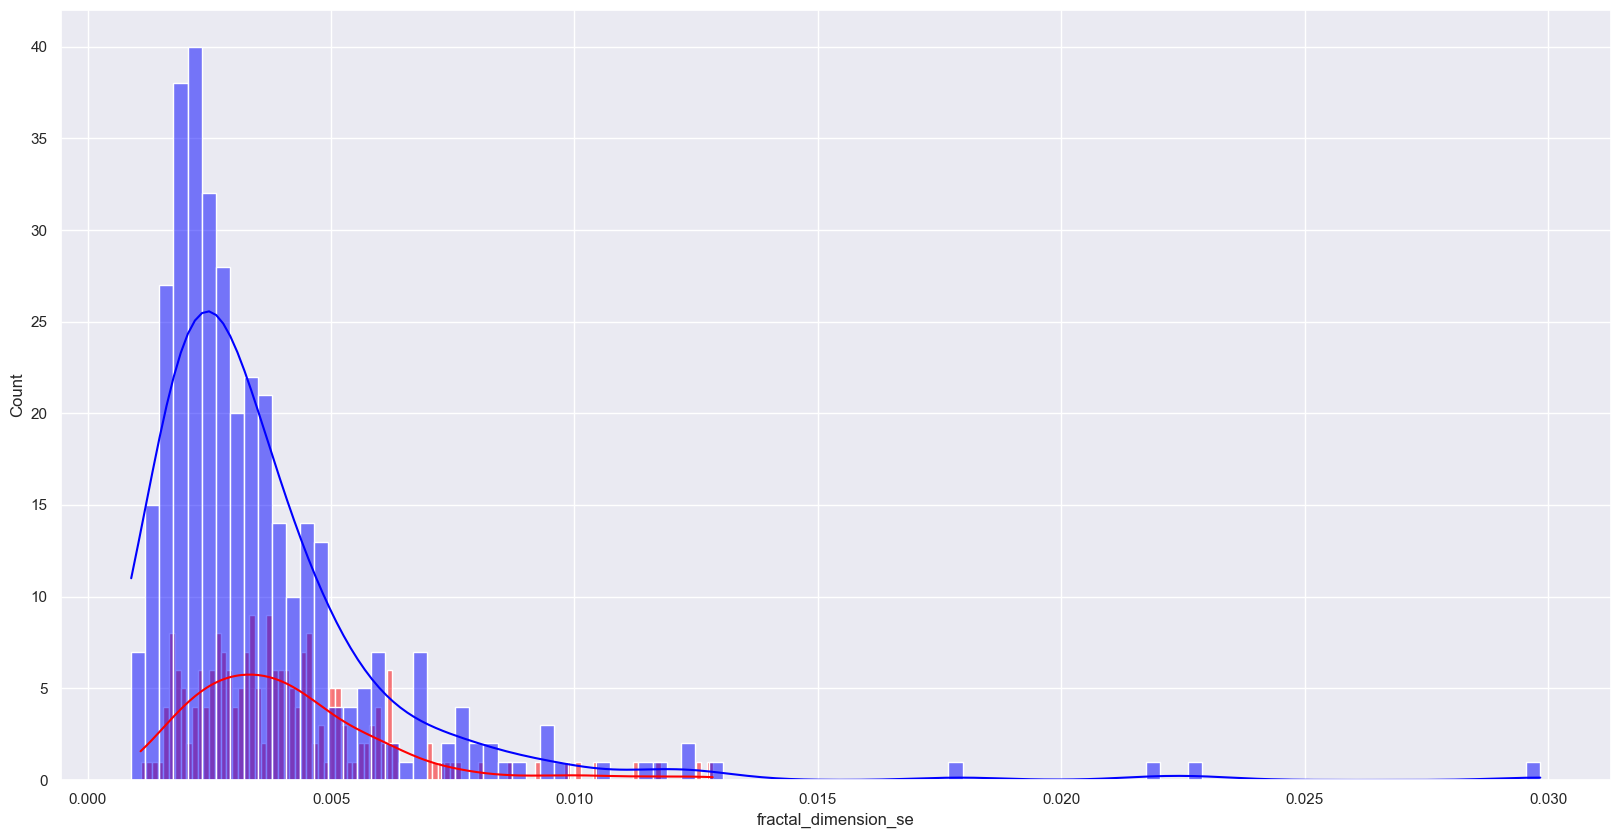

<Figure size 2000x1000 with 0 Axes>

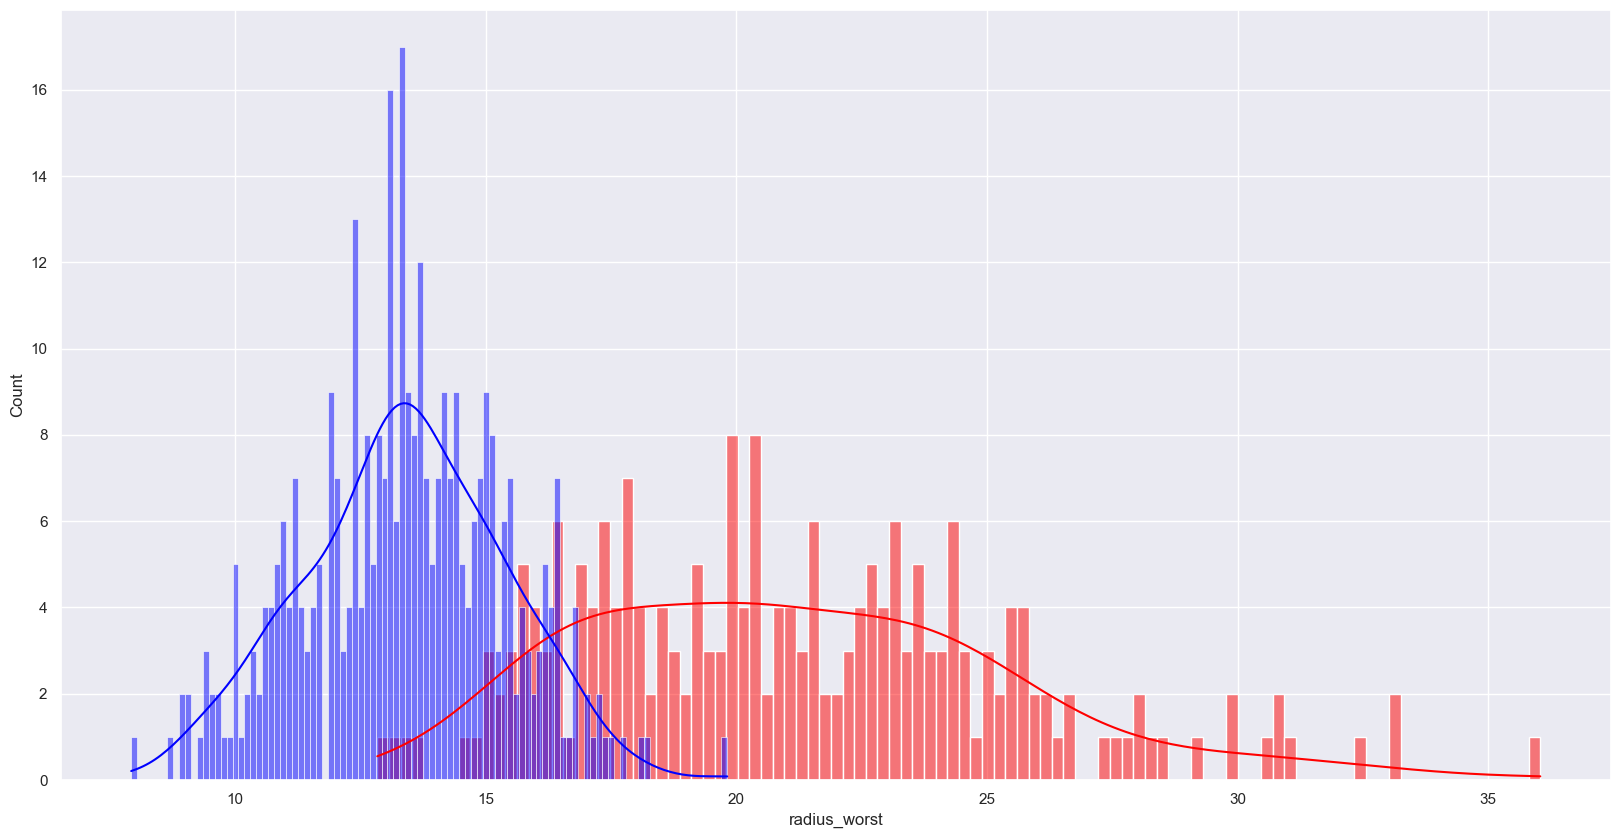

<Figure size 2000x1000 with 0 Axes>

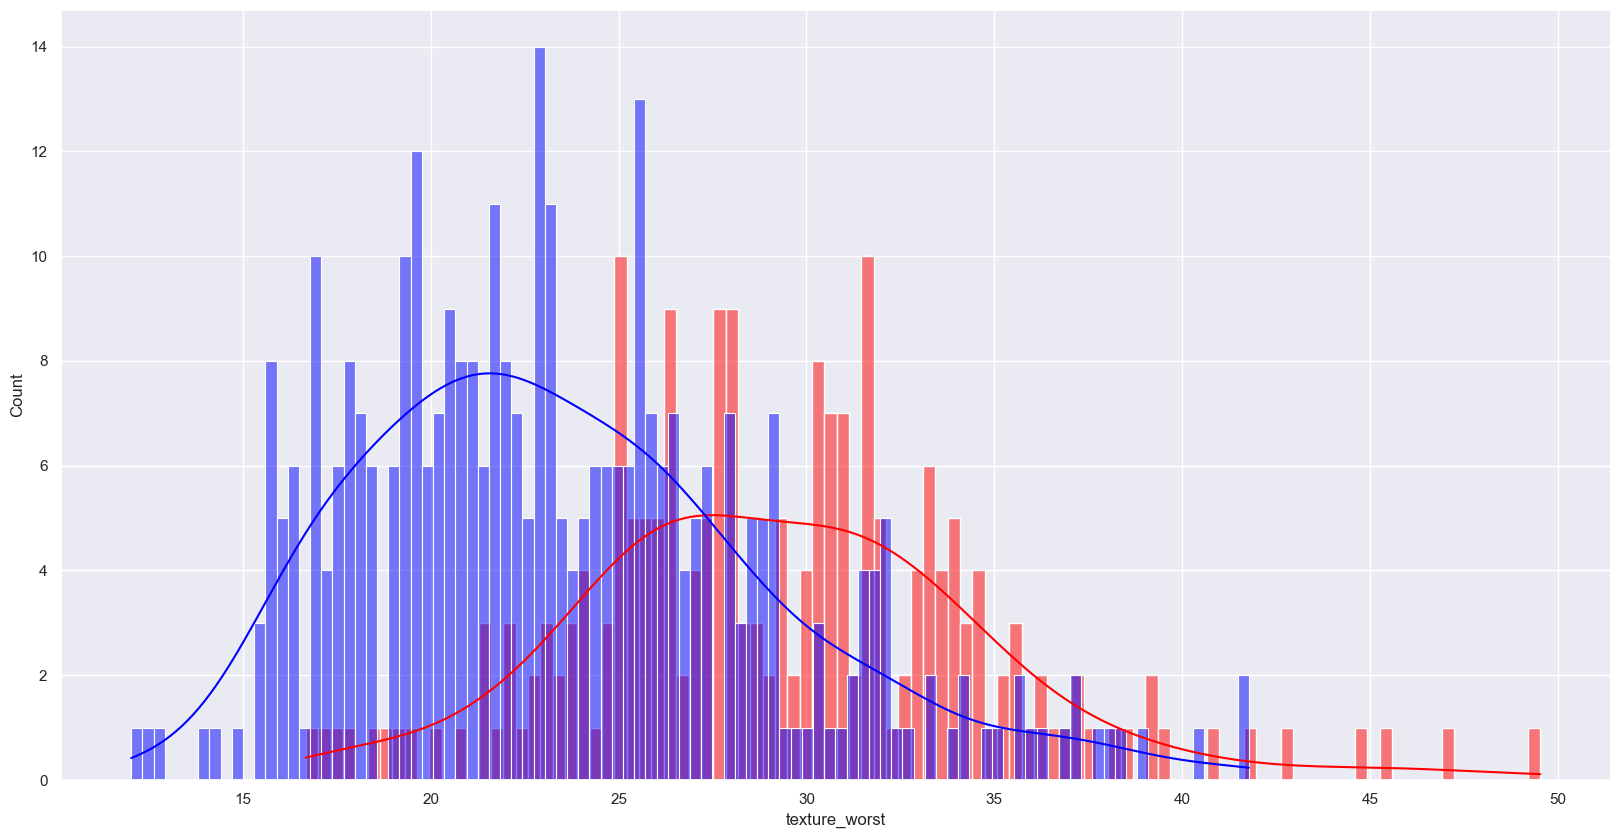

<Figure size 2000x1000 with 0 Axes>

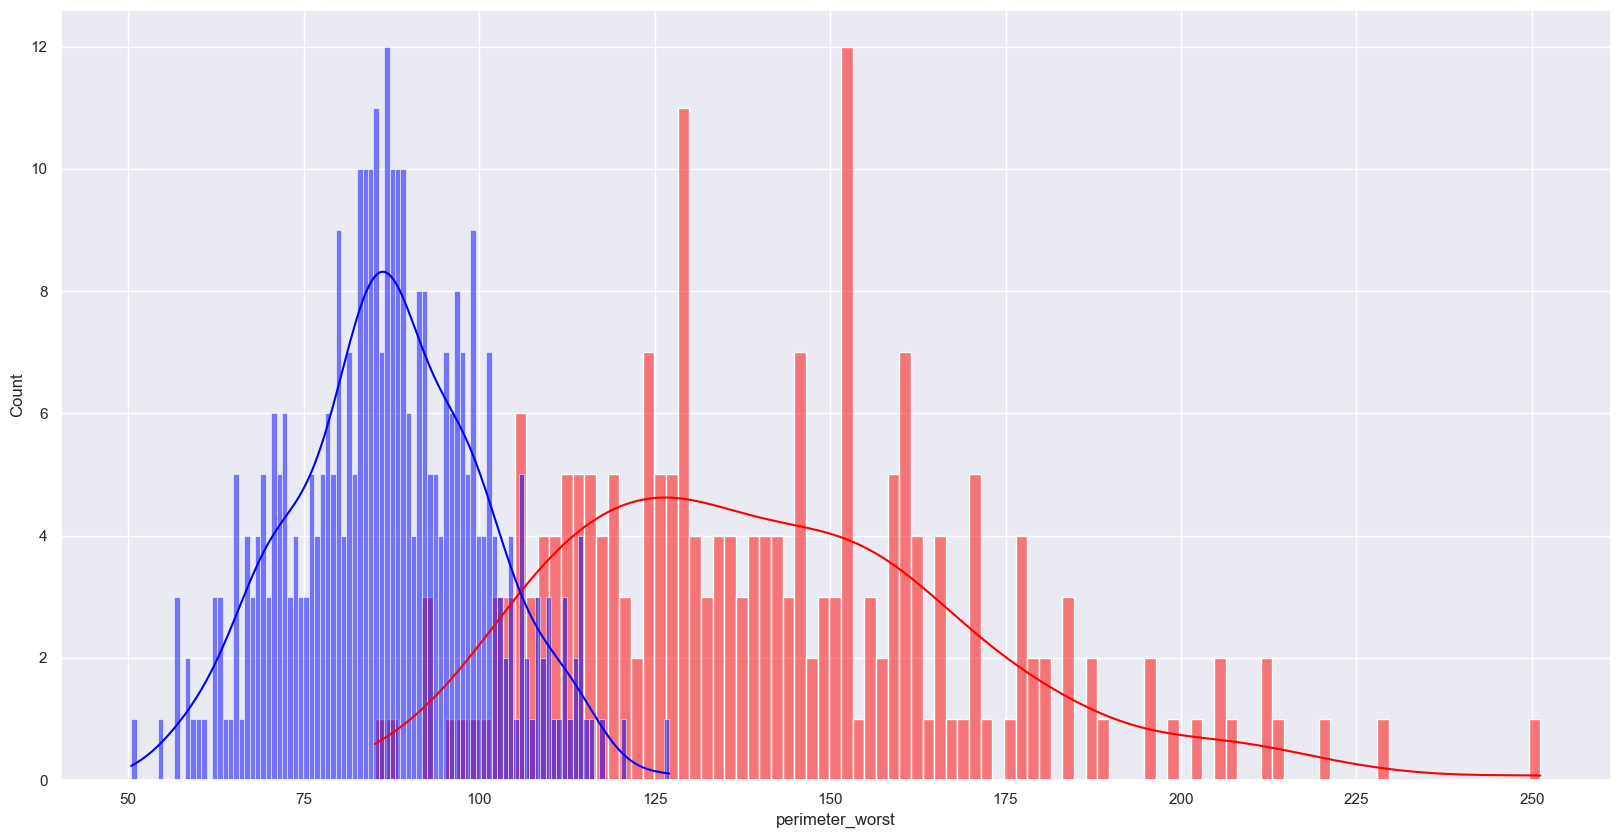

<Figure size 2000x1000 with 0 Axes>

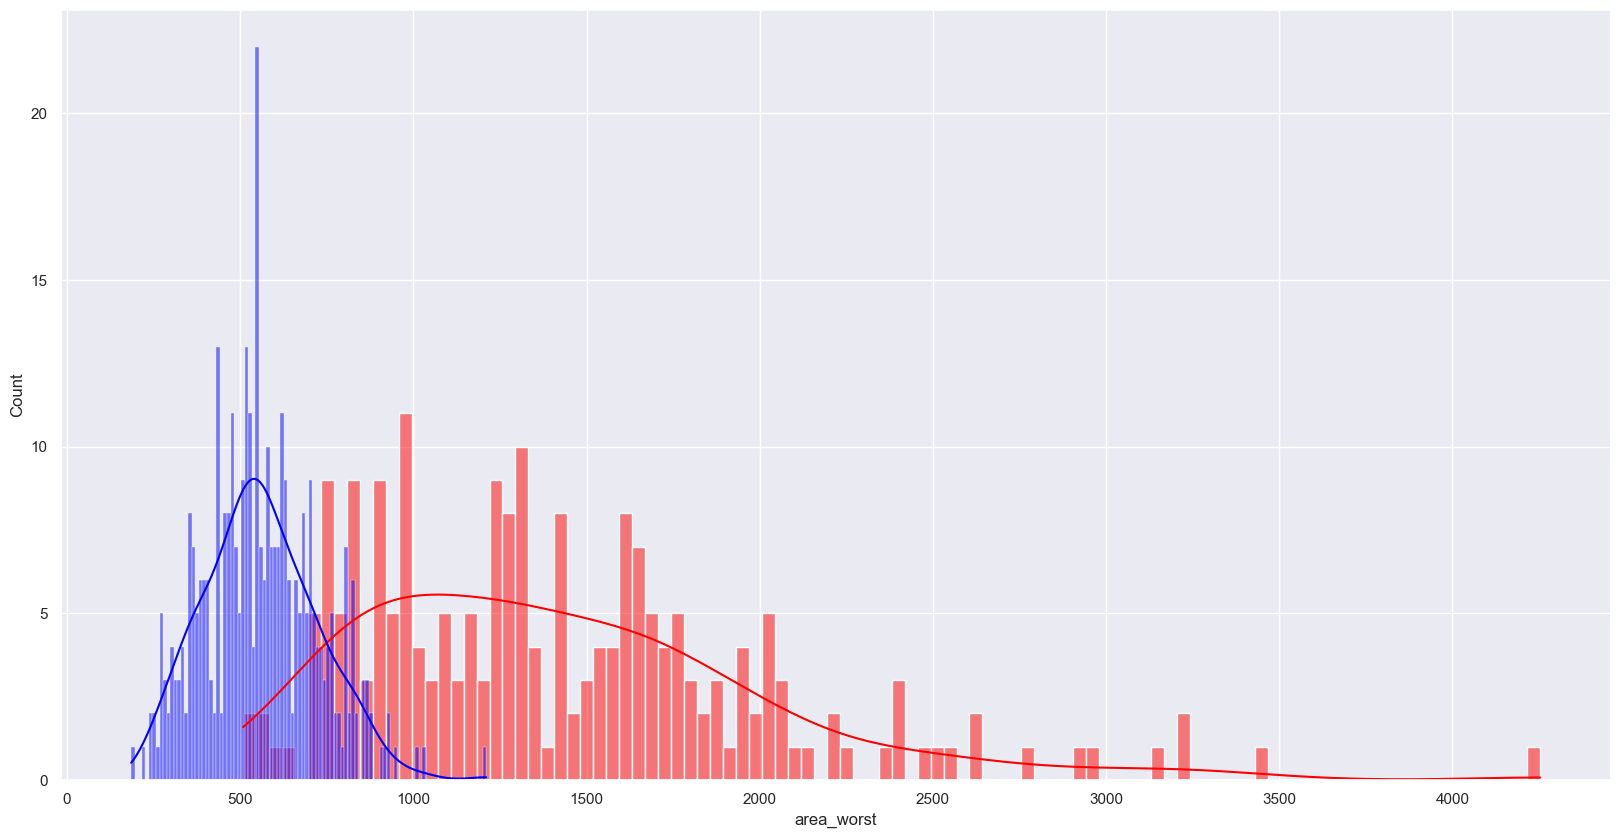

<Figure size 2000x1000 with 0 Axes>

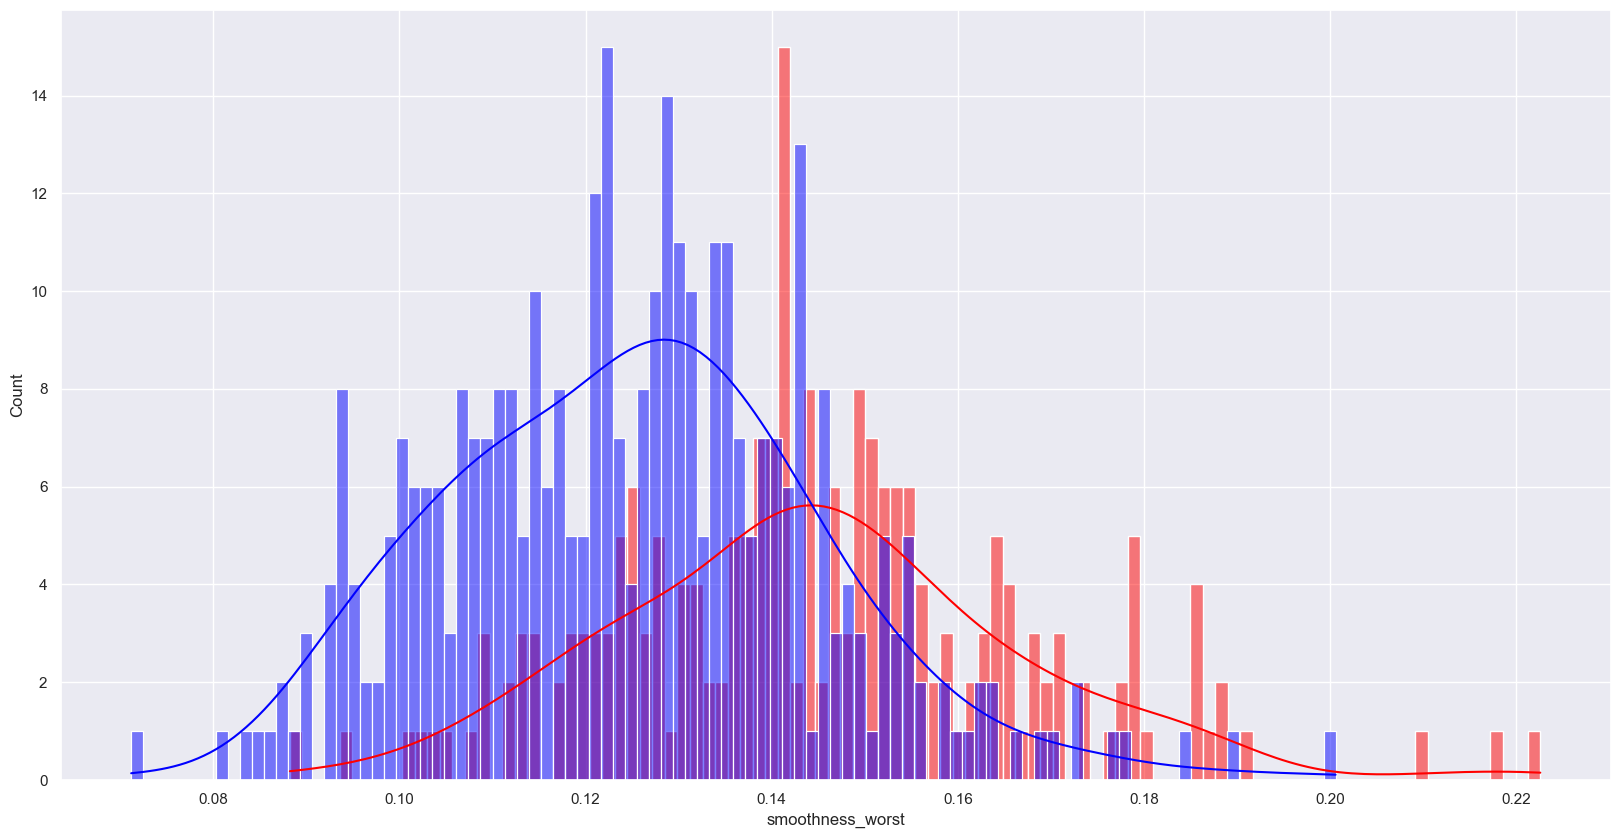

<Figure size 2000x1000 with 0 Axes>

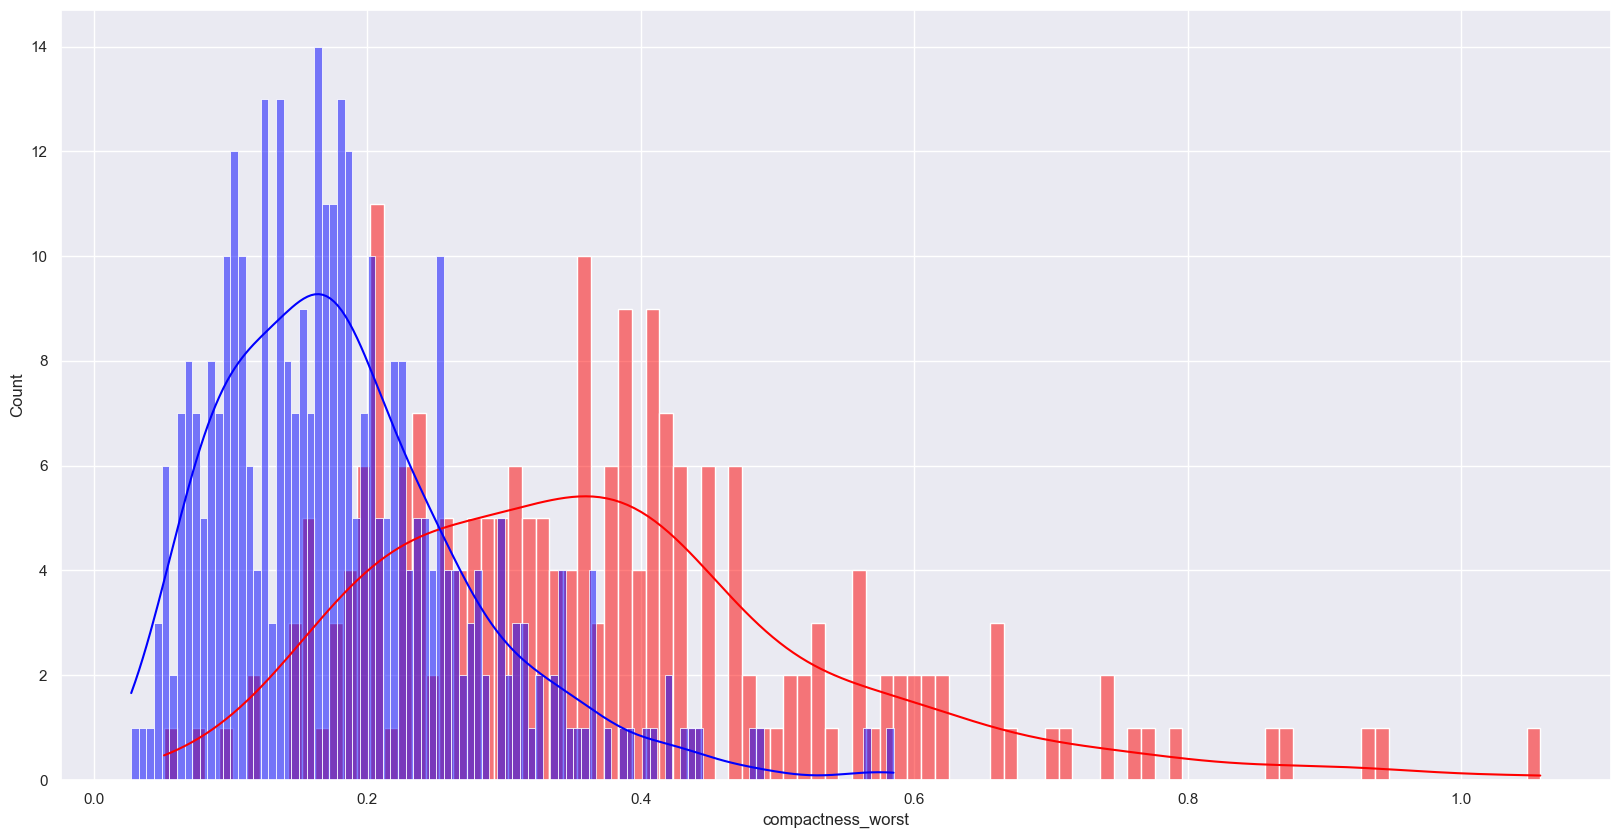

<Figure size 2000x1000 with 0 Axes>

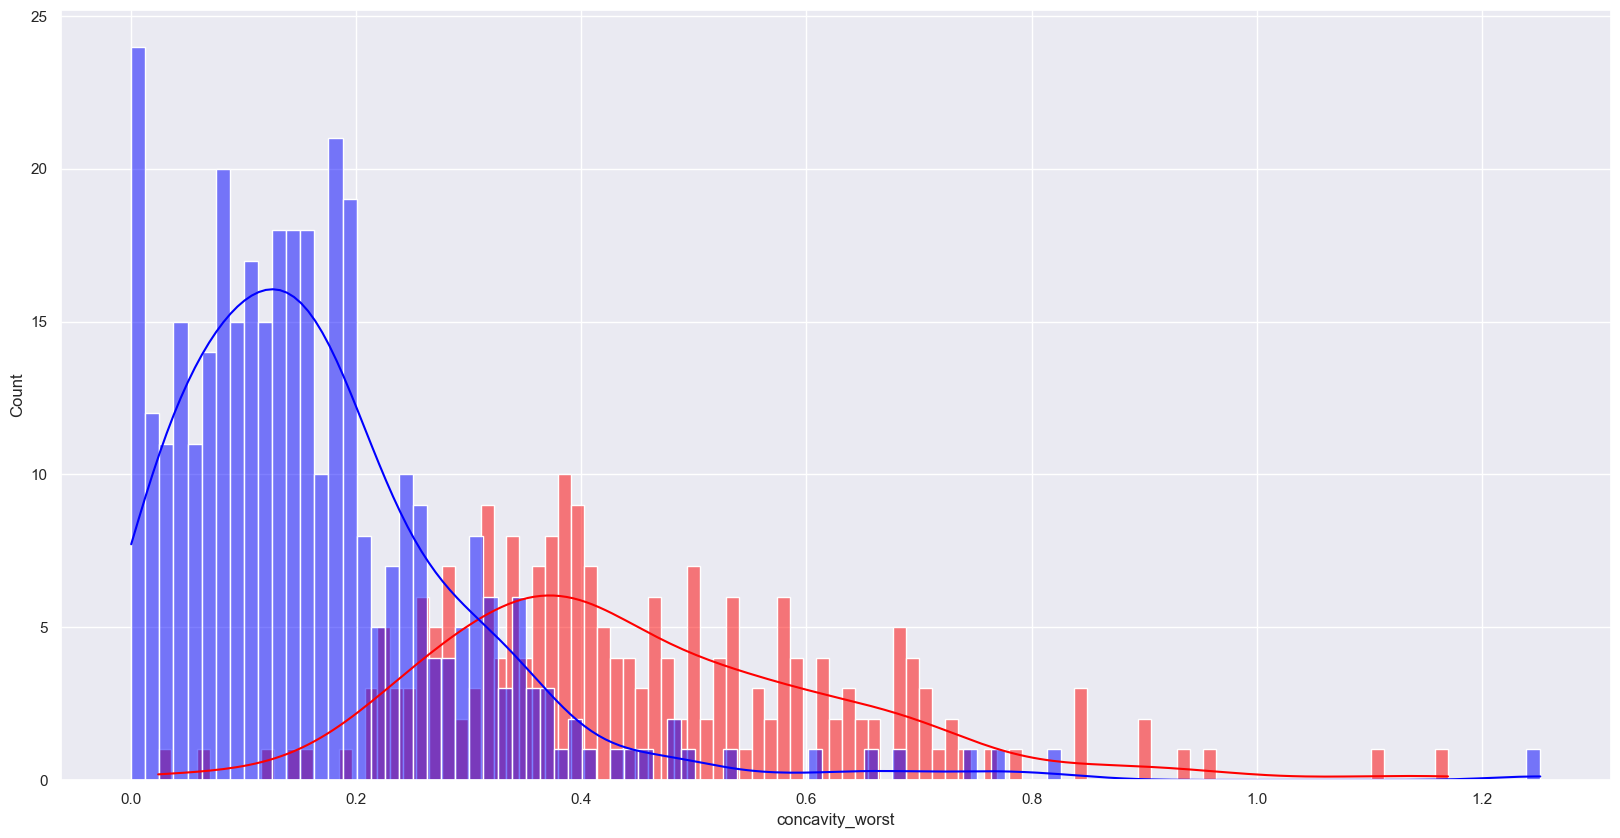

<Figure size 2000x1000 with 0 Axes>

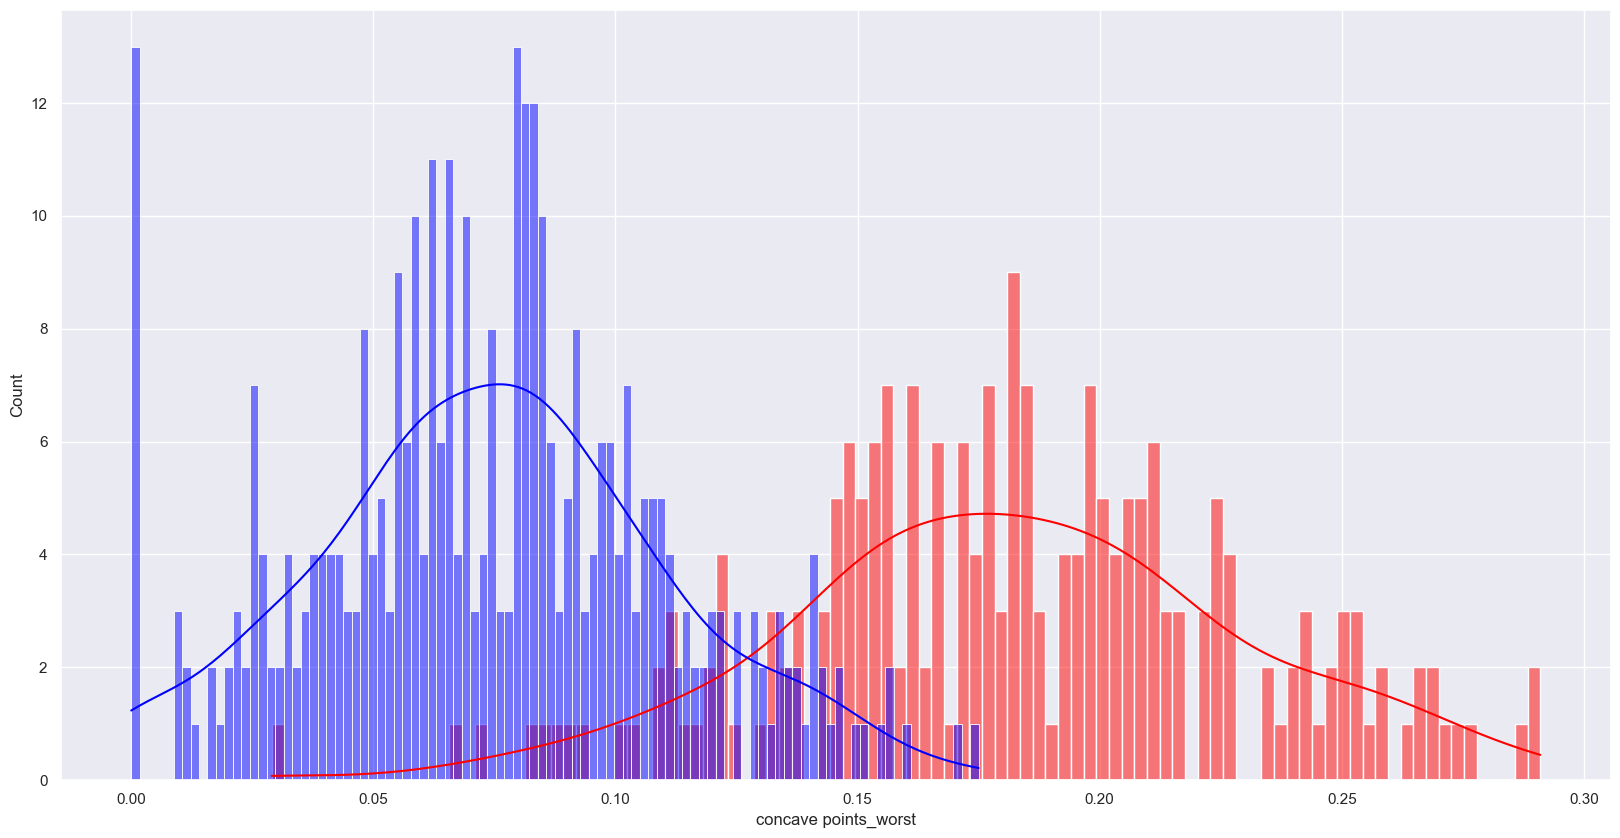

<Figure size 2000x1000 with 0 Axes>

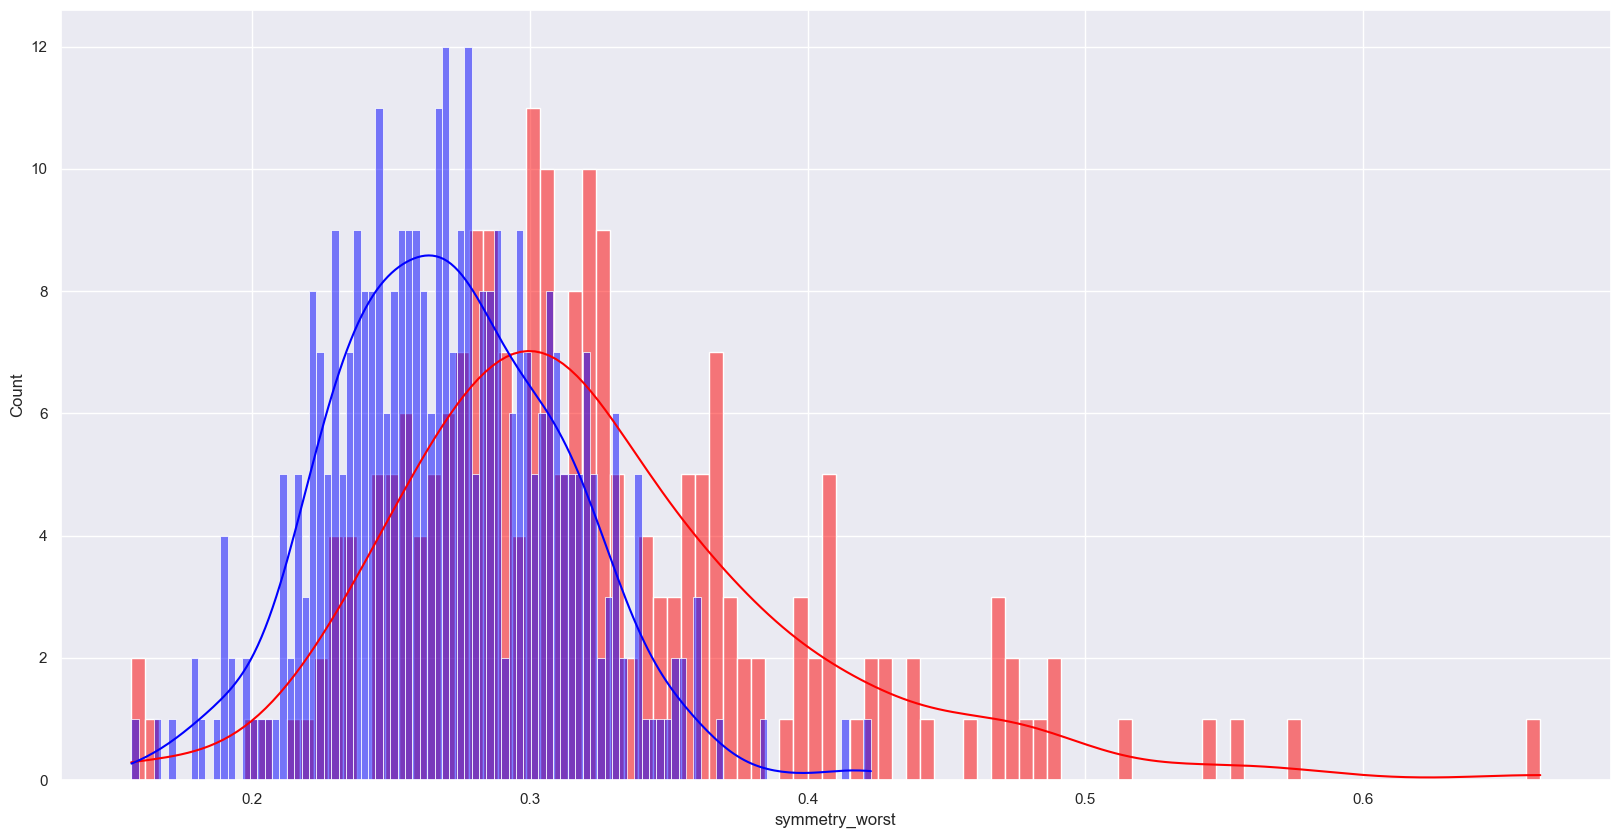

<Figure size 2000x1000 with 0 Axes>

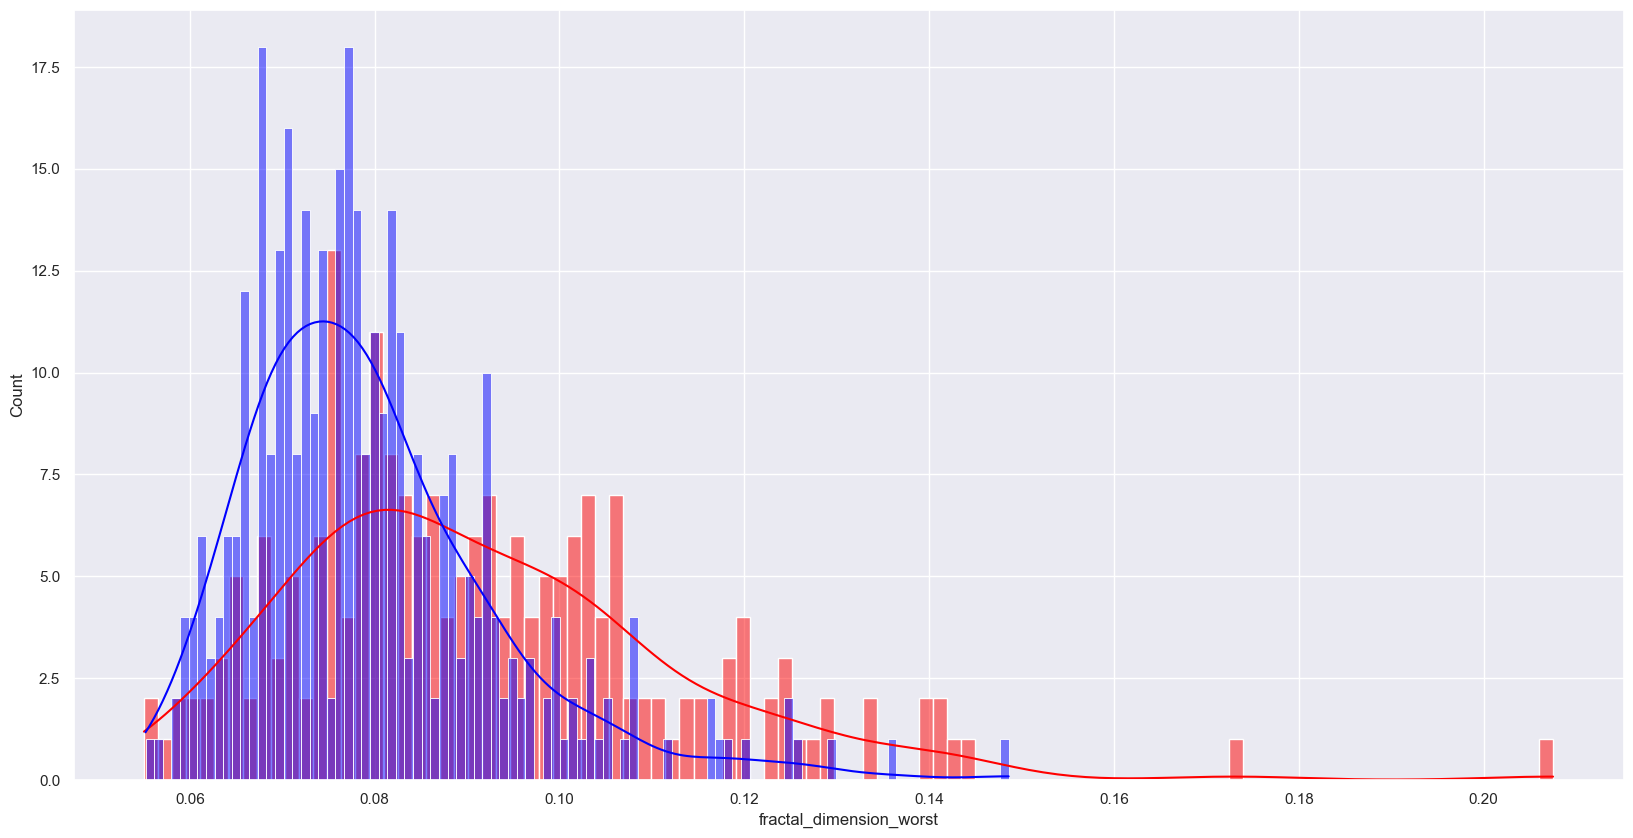

In [165]:
# Loop through all the variables, skipping the 'diagnosis column'
# and plot variables versus diagnosis of 1 or 0

# Below gets rid of the max open warning
plt.rcParams.update({'figure.max_open_warning': 0})
for i in cancer_variables[1:]:
    plt.figure()
    plt.tight_layout()
    #
    #ax.set(title=f'{df[i]}')
    #
    #fig,ax=plt.subplots(figsize=(20,5))
    sns.set(rc={"figure.figsize":(20, 10)})
    f, (ax_hist) = plt.subplots(1, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Count')
    #ax.set_title(f'{df[i]} for positive and negative', fontsize=15)
    sns.histplot(df[i][df["diagnosis"] == 1], color='red', ax=ax_hist, bins = 100, kde=True)
    sns.histplot(df[i][df["diagnosis"] == 0], color='blue', ax=ax_hist , bins = 100, kde=True)

## Conclusion

## References

1. [Wisconsin Breast Cancer dataset, UCI](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)<br>
2. [Wisconsin Breast Cancer dataset,Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?select=data.csv)<br>
3. [Explanation of Fine Needle Aspiration from Cancer.org](https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/fine-needle-aspiration-biopsy-of-the-breast.html)<br>
4. [Analysis of the Wisconsin Breast Cancer Dataset and Machine Learning for Breast Cancer Detection](https://www.researchgate.net/publication/311950799_Analysis_of_the_Wisconsin_Breast_Cancer_Dataset_and_Machine_Learning_for_Breast_Cancer_Detection)<br>
5. [Nested for loop in seaborn](https://aparnamishra144.medium.com/data-visualization-in-a-loop-using-seaborn-and-matplotlib-499ee540726d)<br>
6. [Get rid of max open warning in matplotlib and seaborn](https://stackoverflow.com/questions/27476642/matplotlib-get-rid-of-max-open-warning-output)<br>
7. [Definition of a classifier from Deep AI](https://deepai.org/machine-learning-glossary-and-terms/classifier)<br>
8. [Wikipedia's definition of Decision Trees](https://en.wikipedia.org/wiki/Decision_tree_learning)<br>
9. [Wikipedia's definition of Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)<br>
10. [Wikipedia's definition of K-Nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)<br>
11. [Wikipedia's definition of Support Vector Machines](https://en.wikipedia.org/wiki/Support_vector_machine)<br>
12. [Wikipedia's definition of Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)<br>
13. [](#)<br>
14. [](#)<br>
9. [](#)<br>
9. [](#)<br>
9. [](#)<br>
9. [](#)<br>
9. [](#)<br>
9. [](#)<br>
9. [](#)<br>
9. [](#)<br>
9. [](#)<br>
9. [](#)<br>
9. [](#)<br>
